In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Patients.csv", sep=";")

In [3]:
target_col = "Mental Illness"
categories_column = {
    "Socio-demographic information": [
        "Survey Year","Program Category","Region Served","Age Group","Sex","Transgender","Sexual Orientation",
        "Hispanic Ethnicity","Race","Preferred Language","Religious Preference"
    ],
    "Family and social situation": [
        "Living Situation","Household Composition","Veteran Status","Criminal Justice Status",
        "Three Digit Residence Zip Code"
    ],
    "Professional and educational background": [
        "Employment Status","Number Of Hours Worked Each Week","Education Status","Special Education Services"
    ],
    "Developmental disorders": [
        "Serious Mental Illness","Intellectual Disability","Autism Spectrum","Other Developmental Disability"
    ],
    "Addictions / Substances": [
        "Alcohol Related Disorder","Drug Substance Disorder","Opioid Related Disorder",
        "Cannabis Recreational Use","Cannabis Medicinal Use","Smokes",
        "Received Smoking Medication","Received Smoking Counseling",
        "Alcohol 12m Service","Opioid 12m Service","Drug/Substance 12m Service"
    ],
    "Physical health / Medical conditions": [
        "Mobility Impairment Disorder","Hearing Impairment","Visual Impairment","Speech Impairment",
        "Hyperlipidemia","High Blood Pressure","Diabetes","Obesity","Heart Attack","Stroke","Other Cardiac",
        "Pulmonary Asthma","Alzheimer or Dementia","Kidney Disease","Liver Disease","Endocrine Condition",
        "Neurological Condition","Traumatic Brain Injury","Joint Disease","Cancer",
        "Other Chronic Med Condition","No Chronic Med Condition","Unknown Chronic Med Condition"
    ],
    "Medical diagnosis": [
        "Principal Diagnosis Class","Additional Diagnosis Class"
    ],
    "Financial and social assistance": [
        "SSI Cash Assistance","SSDI Cash Assistance","Veterans Disability Benefits","Veterans Cash Assistance",
        "Public Assistance Cash Program","Other Cash Benefits"
    ],
    "Health insurance": [
        "Medicaid and Medicare Insurance","No Insurance","Unknown Insurance Coverage","Medicaid Insurance",
        "Medicaid Managed Insurance","Medicare Insurance","Private Insurance","Child Health Plus Insurance","Other Insurance"
    ]
}

In [4]:
print("Shape du dataset :", df.shape)
df.head()

Shape du dataset : (196102, 76)


Survey Year Program Category         Region Served Age Group     Sex  \
0         2019       OUTPATIENT    LONG ISLAND REGION     ADULT    MALE   
1         2019       OUTPATIENT  NEW YORK CITY REGION     ADULT    MALE   
2         2019       OUTPATIENT   HUDSON RIVER REGION     ADULT    MALE   
3         2019      RESIDENTIAL  NEW YORK CITY REGION     ADULT    MALE   
4         2019       OUTPATIENT        WESTERN REGION     ADULT  FEMALE   

           Transgender        Sexual Orientation       Hispanic Ethnicity  \
0  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL     YES, HISPANIC/LATINO   
1  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL  NO, NOT HISPANIC/LATINO   
2  NO, NOT TRANSGENDER            LESBIAN OR GAY  NO, NOT HISPANIC/LATINO   
3  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL                  UNKNOWN   
4  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL  NO, NOT HISPANIC/LATINO   

         Race        Living Situation  ... No Insurance  \
0  WHITE ONLY       PRIVATE RESIDENCE  ...           NO   
1  WHITE ONLY       PRIVATE RESIDENCE  ...           NO   
2  WHITE ONLY       PRIVATE RESIDENCE  ...           NO   
3       OTHER  OTHER LIVING SITUATION  ...           NO   
4  WHITE ONLY       PRIVATE RESIDENCE  ...           NO   

  Unknown Insurance Coverage Medicaid Insurance Medicaid Managed Insurance  \
0                      False                YES                        YES   
1                      False                YES                        YES   
2                      False                YES                        YES   
3                      False                YES                         NO   
4                      False                YES                        YES   

  Medicare Insurance Private Insurance Child Health Plus Insurance  \
0                 NO                NO                          NO   
1                 NO                NO                          NO   
2                 NO                NO                          NO   
3                 NO                NO                          NO   
4                 NO                NO                          NO   

  Other Insurance Criminal Justice Status Three Digit Residence Zip Code  
0              NO                      NO                            117  
1              NO                      NO                            100  
2              NO                      NO                            120  
3              NO                      NO                            114  
4              NO                      NO                            142  

[5 rows x 76 columns]

In [5]:
df.tail()

Survey Year Program Category         Region Served Age Group     Sex  \
196097         2019       OUTPATIENT   HUDSON RIVER REGION     ADULT  FEMALE   
196098         2019       OUTPATIENT  NEW YORK CITY REGION     ADULT    MALE   
196099         2019       OUTPATIENT  NEW YORK CITY REGION     ADULT    MALE   
196100         2019          SUPPORT   HUDSON RIVER REGION     CHILD  FEMALE   
196101         2019       OUTPATIENT  NEW YORK CITY REGION     ADULT    MALE   

                Transgender        Sexual Orientation  \
196097  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
196098  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
196099  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL   
196100  NO, NOT TRANSGENDER                   UNKNOWN   
196101  NO, NOT TRANSGENDER                   UNKNOWN   

             Hispanic Ethnicity        Race        Living Situation  ...  \
196097  NO, NOT HISPANIC/LATINO  WHITE ONLY  OTHER LIVING SITUATION  ...   
196098  NO, NOT HISPANIC/LATINO  WHITE ONLY       PRIVATE RESIDENCE  ...   
196099  NO, NOT HISPANIC/LATINO  WHITE ONLY       PRIVATE RESIDENCE  ...   
196100  NO, NOT HISPANIC/LATINO  BLACK ONLY       PRIVATE RESIDENCE  ...   
196101  NO, NOT HISPANIC/LATINO       OTHER                 UNKNOWN  ...   

       No Insurance Unknown Insurance Coverage Medicaid Insurance  \
196097           NO                      False                YES   
196098           NO                      False                YES   
196099           NO                      False                YES   
196100           NO                      False                YES   
196101           NO                      False                YES   

       Medicaid Managed Insurance Medicare Insurance Private Insurance  \
196097                        YES                 NO                NO   
196098                         NO                YES                NO   
196099                         NO                YES                NO   
196100                        YES                 NO                NO   
196101                        YES                YES                NO   

       Child Health Plus Insurance Other Insurance Criminal Justice Status  \
196097                          NO              NO                      NO   
196098                          NO              NO                      NO   
196099                          NO              NO                      NO   
196100                          NO              NO                      NO   
196101                          NO              NO                      NO   

       Three Digit Residence Zip Code  
196097                            109  
196098                            111  
196099                            114  
196100                            105  
196101                            999  

[5 rows x 76 columns]

In [6]:
for col in df.columns:
    uniques = df[col].unique()
    print(f"{col}: {uniques}")

Survey Year: [2019]
Program Category: ['OUTPATIENT' 'RESIDENTIAL' 'SUPPORT' 'INPATIENT' 'EMERGENCY']
Region Served: ['LONG ISLAND REGION' 'NEW YORK CITY REGION' 'HUDSON RIVER REGION'
 'WESTERN REGION' 'CENTRAL NY REGION']
Age Group: ['ADULT' 'CHILD' 'UNKNOWN']
Sex: ['MALE' 'FEMALE' 'UNKNOWN']
Transgender: ['NO, NOT TRANSGENDER' 'YES, TRANSGENDER' "CLIENT DIDN'T ANSWER" 'UNKNOWN']
Sexual Orientation: ['STRAIGHT OR HETEROSEXUAL' 'LESBIAN OR GAY' 'OTHER' 'BISEXUAL'
 'CLIENT DID NOT ANSWER' 'UNKNOWN']
Hispanic Ethnicity: ['YES, HISPANIC/LATINO' 'NO, NOT HISPANIC/LATINO' 'UNKNOWN']
Race: ['WHITE ONLY' 'OTHER' 'BLACK ONLY' 'MULTI-RACIAL' 'UNKNOWN RACE']
Living Situation: ['PRIVATE RESIDENCE' 'OTHER LIVING SITUATION' 'UNKNOWN'
 'INSTITUTIONAL SETTING']
Household Composition: ['COHABITATES WITH OTHERS' 'LIVES ALONE' 'NOT APPLICABLE' 'UNKNOWN']
Preferred Language: ['ENGLISH' 'SPANISH' 'INDO-EUROPEAN' 'AFRO-ASIATIC'
 'ASIAN AND PACIFIC ISLAND' 'UNKNOWN' 'ALL OTHER LANGUAGES']
Religious Preferenc

In [7]:
df =df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189850 entries, 0 to 196101
Data columns (total 76 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Survey Year                       189850 non-null  int64 
 1   Program Category                  189850 non-null  object
 2   Region Served                     189850 non-null  object
 3   Age Group                         189850 non-null  object
 4   Sex                               189850 non-null  object
 5   Transgender                       189850 non-null  object
 6   Sexual Orientation                189850 non-null  object
 7   Hispanic Ethnicity                189850 non-null  object
 8   Race                              189850 non-null  object
 9   Living Situation                  189850 non-null  object
 10  Household Composition             189850 non-null  object
 11  Preferred Language                189850 non-null  object
 12  Religio

In [9]:
print("\nTypes de variables :")
df.dtypes.value_counts()


Types de variables :



Types de variables :


object    72
int64      2
bool       2
Name: count, dtype: int64

In [10]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()

In [11]:
print("\nVariables numériques :", num_cols)
print("Variables catégorielles :", len(cat_cols))
print("Variables booléennes :", bool_cols)


Variables numériques : ['Survey Year', 'Three Digit Residence Zip Code']
Variables catégorielles : 72
Variables booléennes : ['Unknown Chronic Med Condition', 'Unknown Insurance Coverage']


In [12]:
df = df.drop(num_cols + ["Serious Mental Illness"], axis=1) # Informations pas utiles à l'étude et trop proche de la cible

categories = {cat: [col for col in cols if col in df.columns] 
              for cat, cols in categories_column.items()}

In [14]:
df.isna().sum()

Program Category               0
Region Served                  0
Age Group                      0
Sex                            0
Transgender                    0
                              ..
Medicare Insurance             0
Private Insurance              0
Child Health Plus Insurance    0
Other Insurance                0
Criminal Justice Status        0
Length: 73, dtype: int64

Pour l'instant uniquement les UNKNOWN,'DATA NOT AVAILABLE', 'NOT APPLICABLE' en valeurs manquantes,, maybe add après "CLIENT DIDN'T ANSWER", 'CLIENT DID NOT ANSWER', 'UNKNOWN EMPLOYMENT STATUS', 'UNKNOWN RACE', 'UNKNOWN INSURANCE COVERAGE', etc

Valeurs uniques de la cible : ['YES' 'NO' 'UNKNOWN']

Répartition de la cible :
Mental Illness
YES        0.962386
NO         0.028628
UNKNOWN    0.008986
Name: proportion, dtype: float64


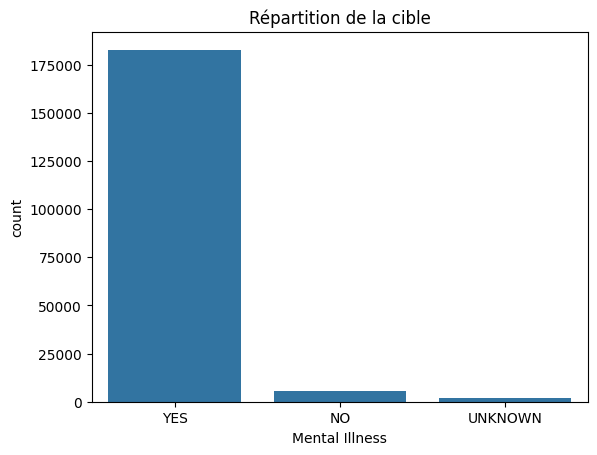

In [36]:
# Graphes avant modification des valeurs nulles

# Vérification de la colonne cible (ici "Mental Illness", adapte si besoin)
print("Valeurs uniques de la cible :", df[target_col].unique())
print("\nRépartition de la cible :")
print(df[target_col].value_counts(normalize=True))

# Visualisation de la distribution de la cible
sns.countplot(x=target_col, data=df,)
plt.title("Répartition de la cible")
plt.show()

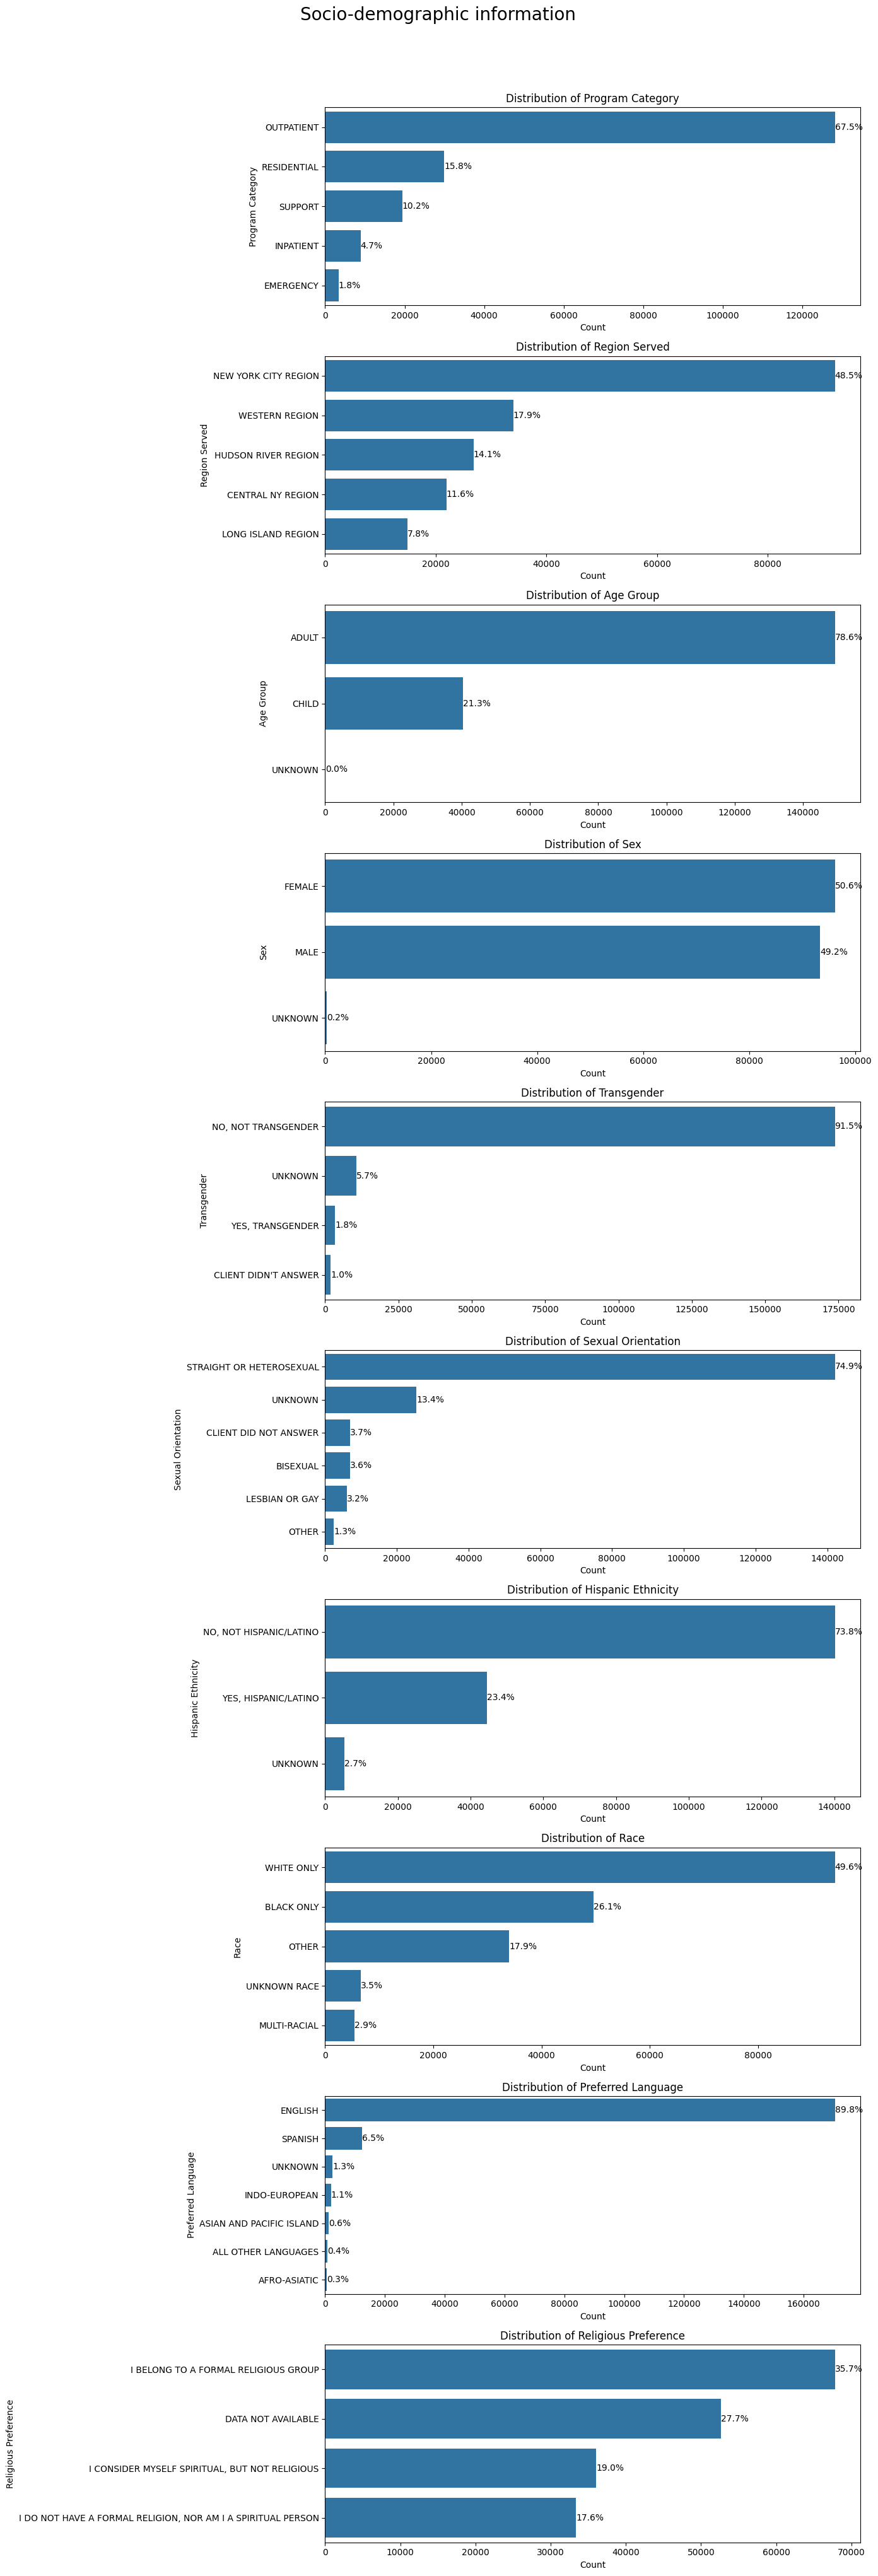

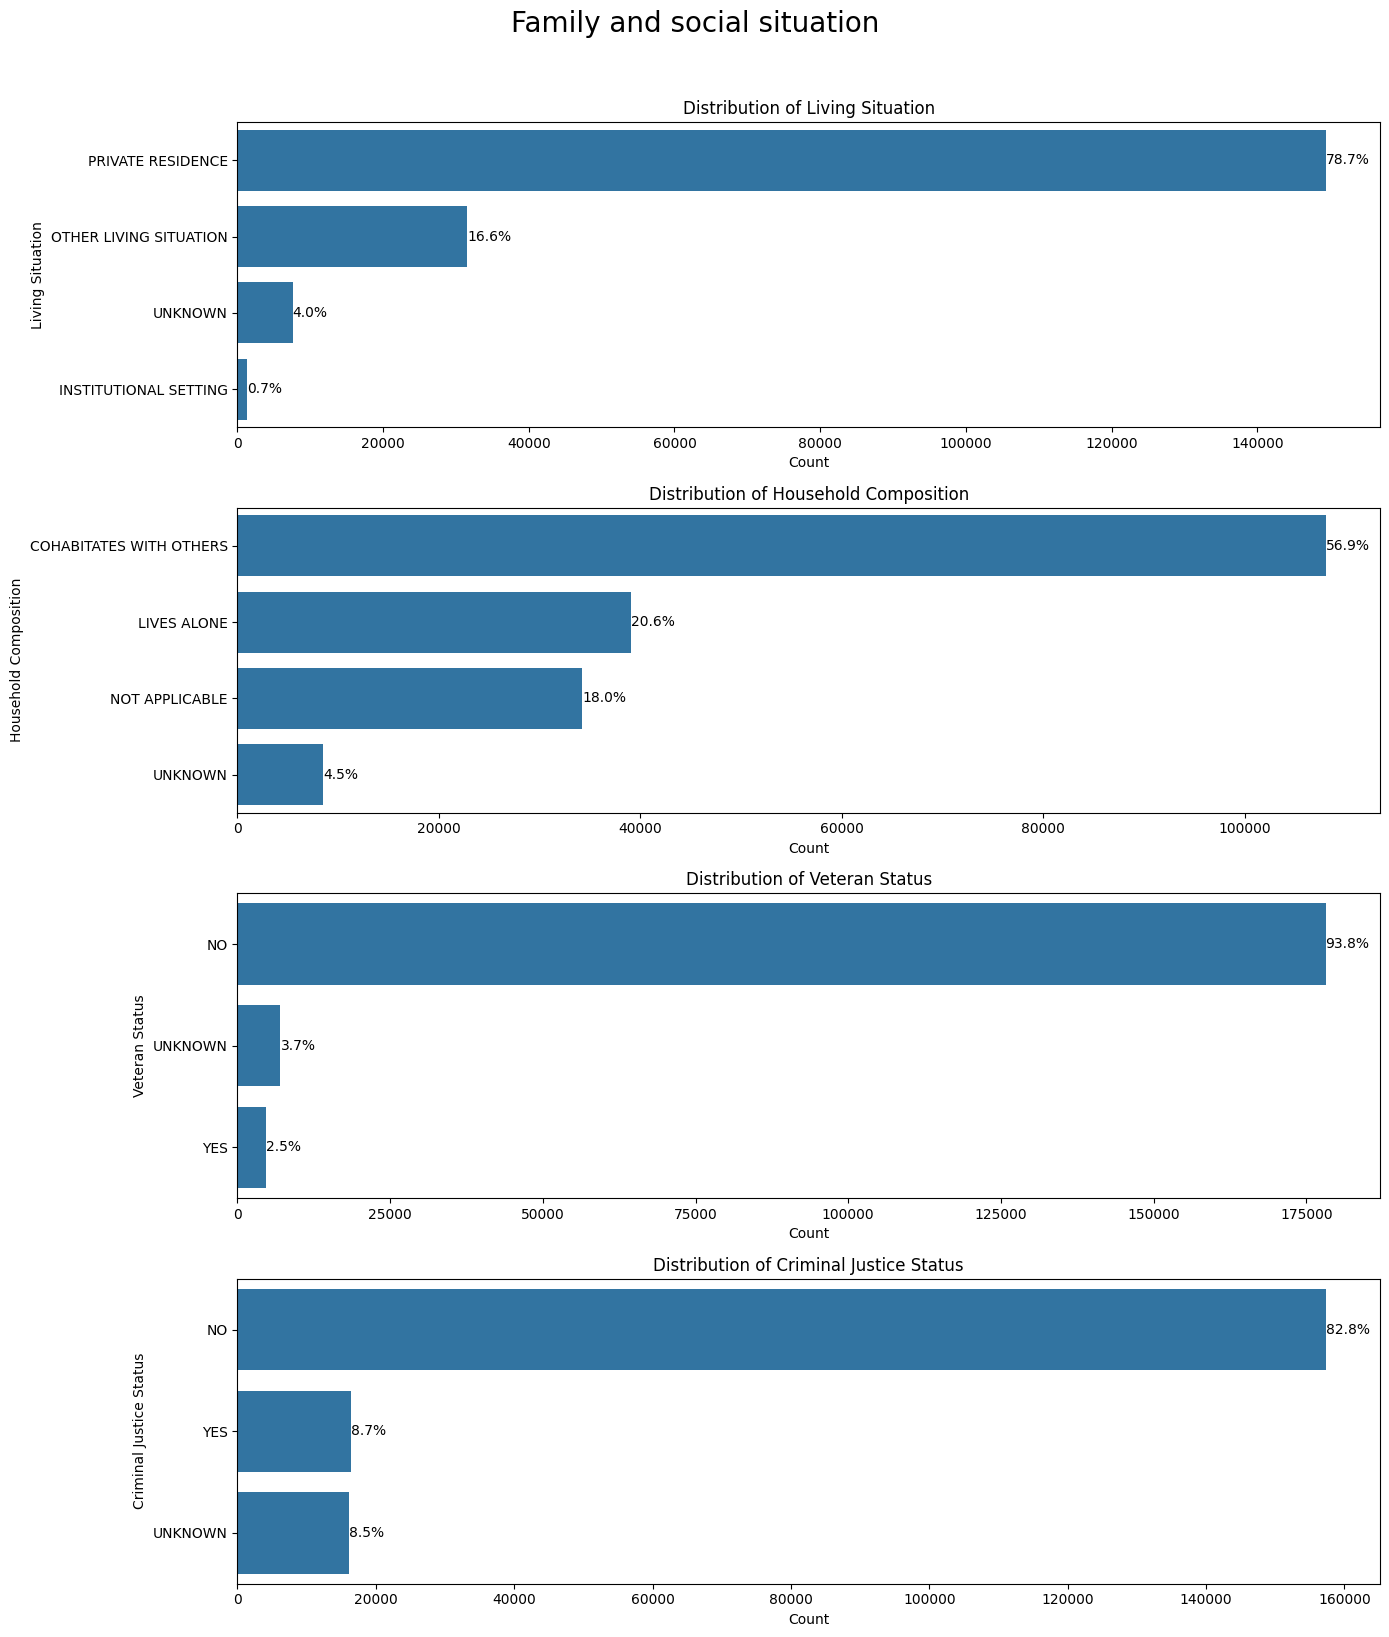

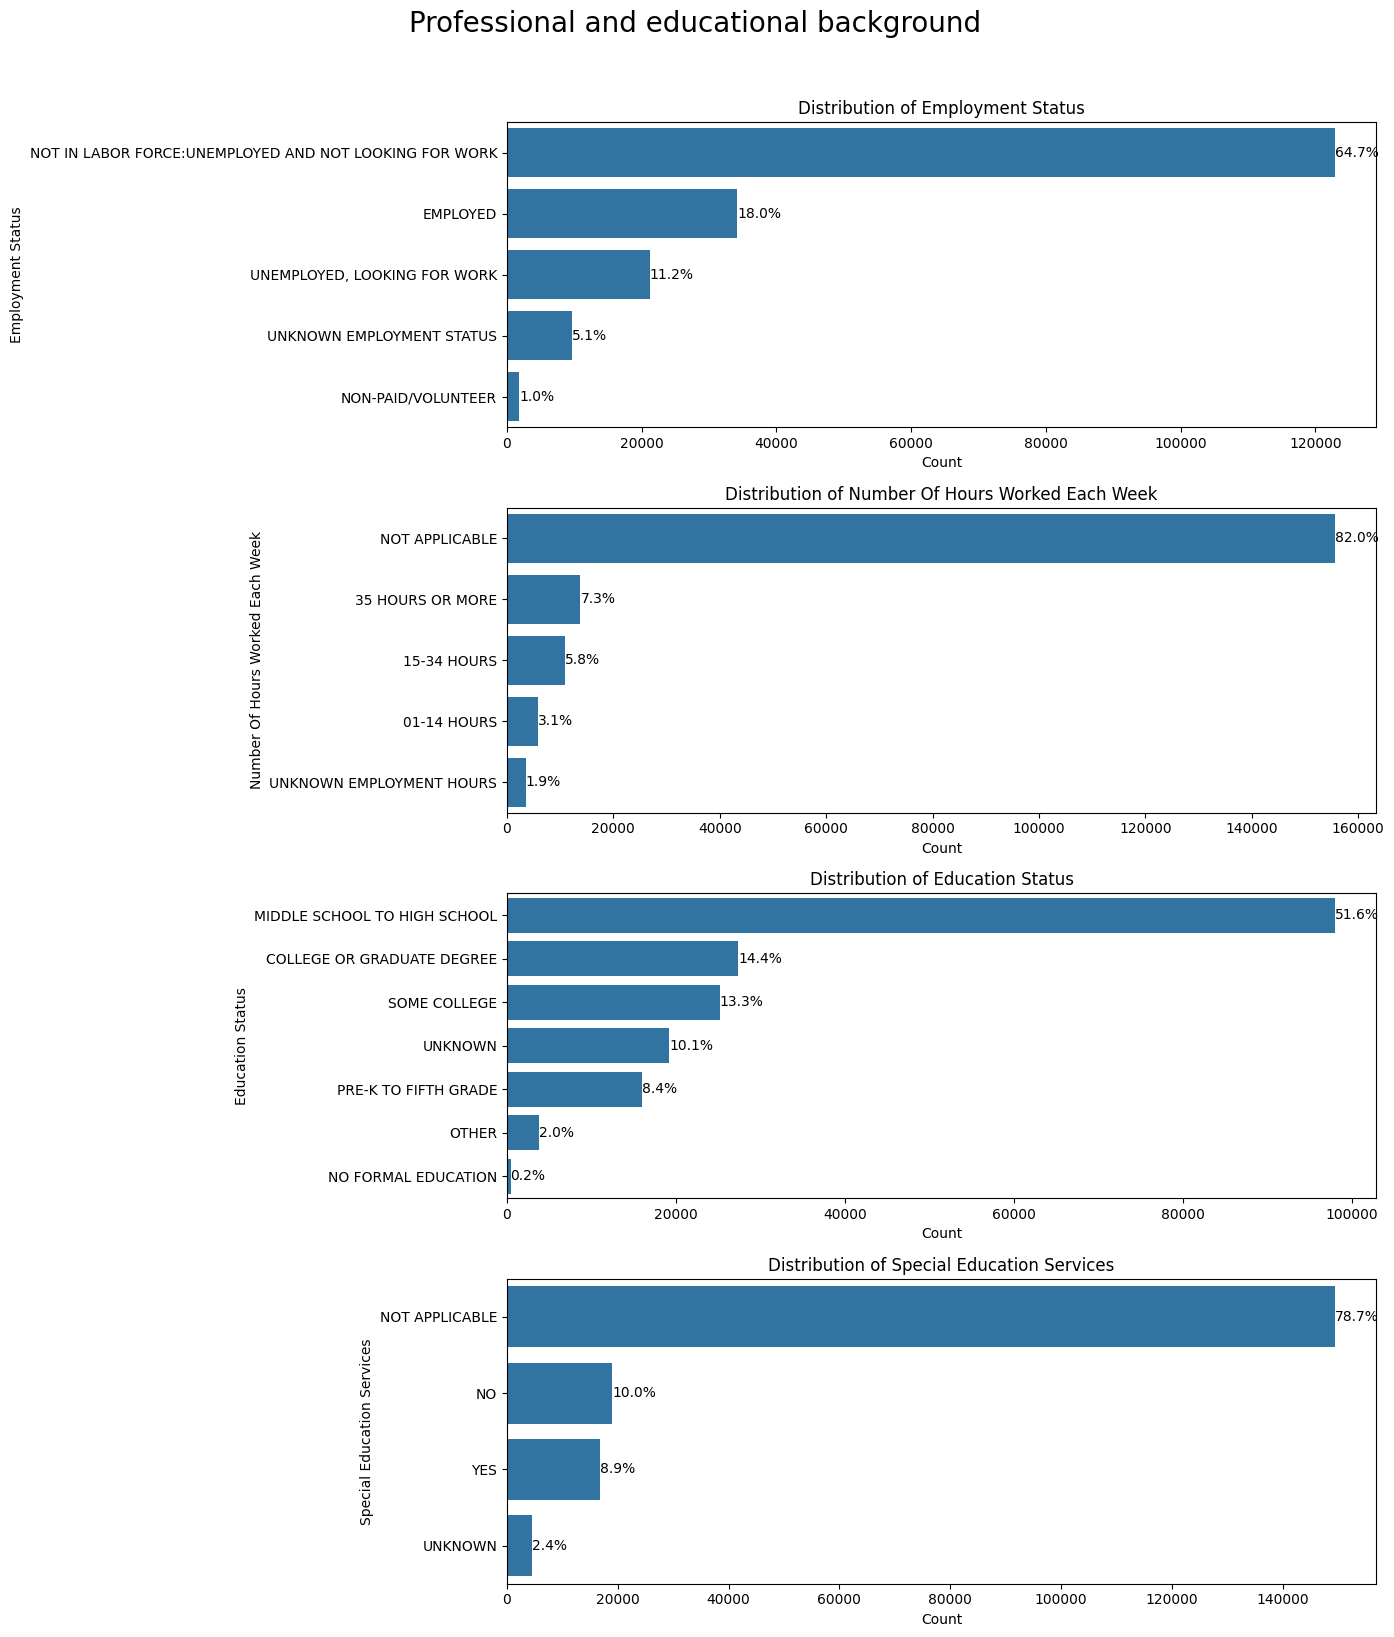

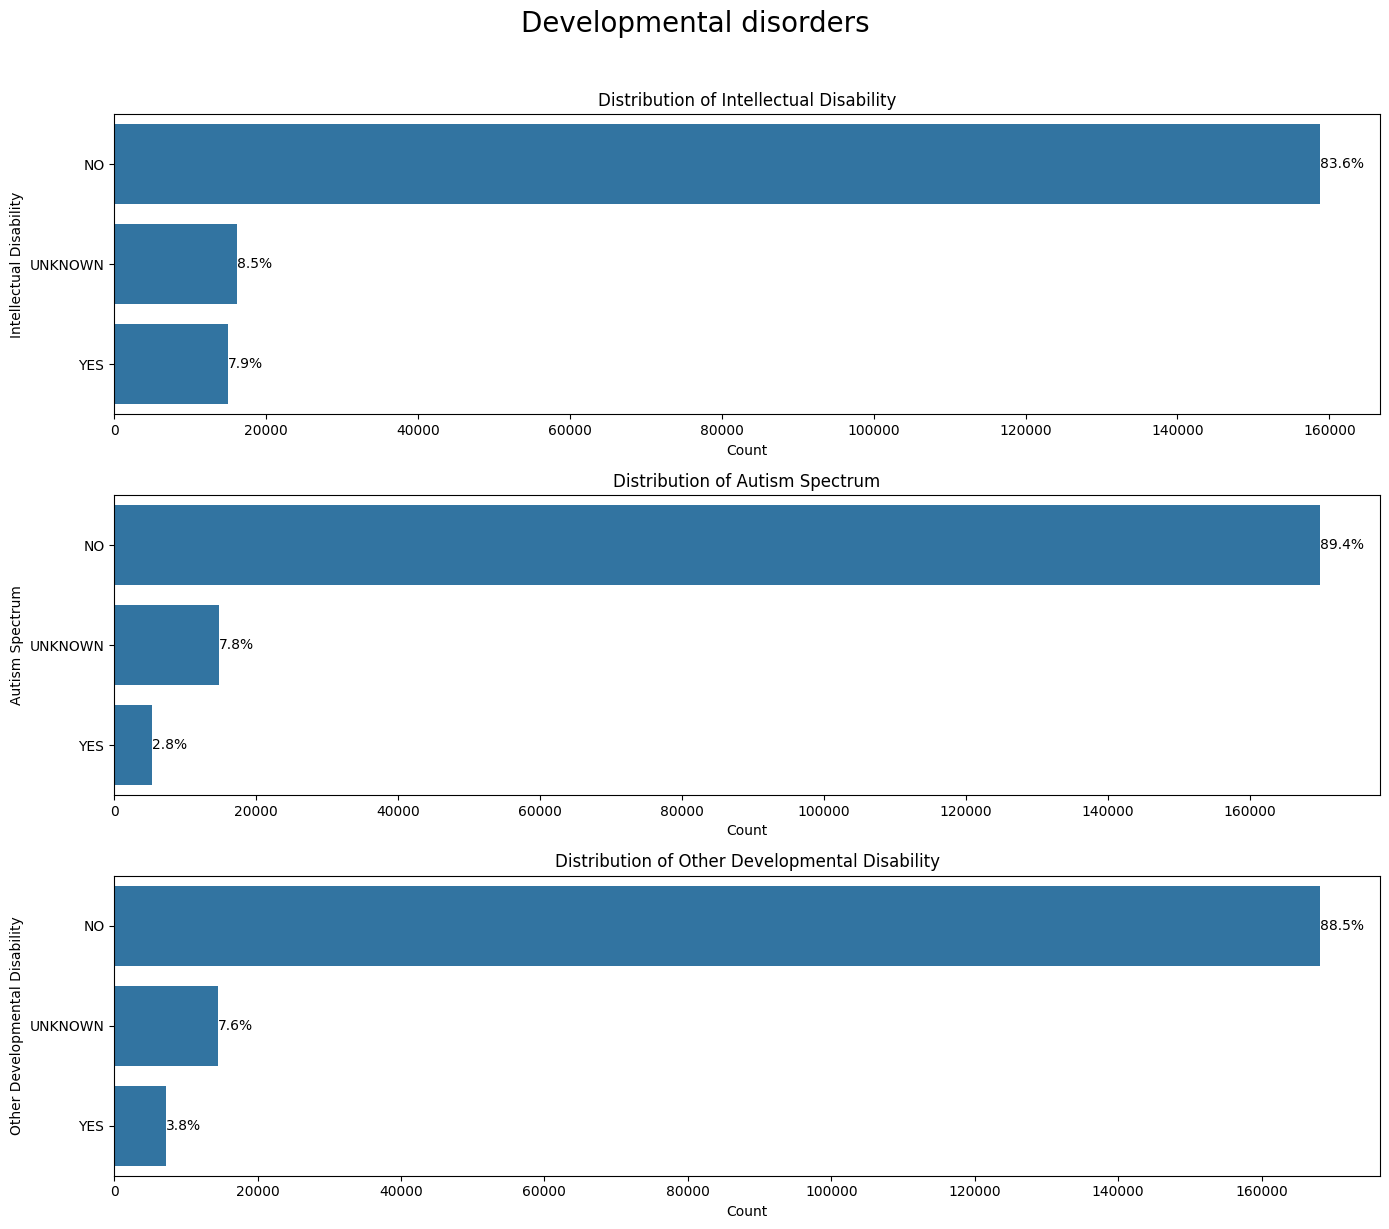

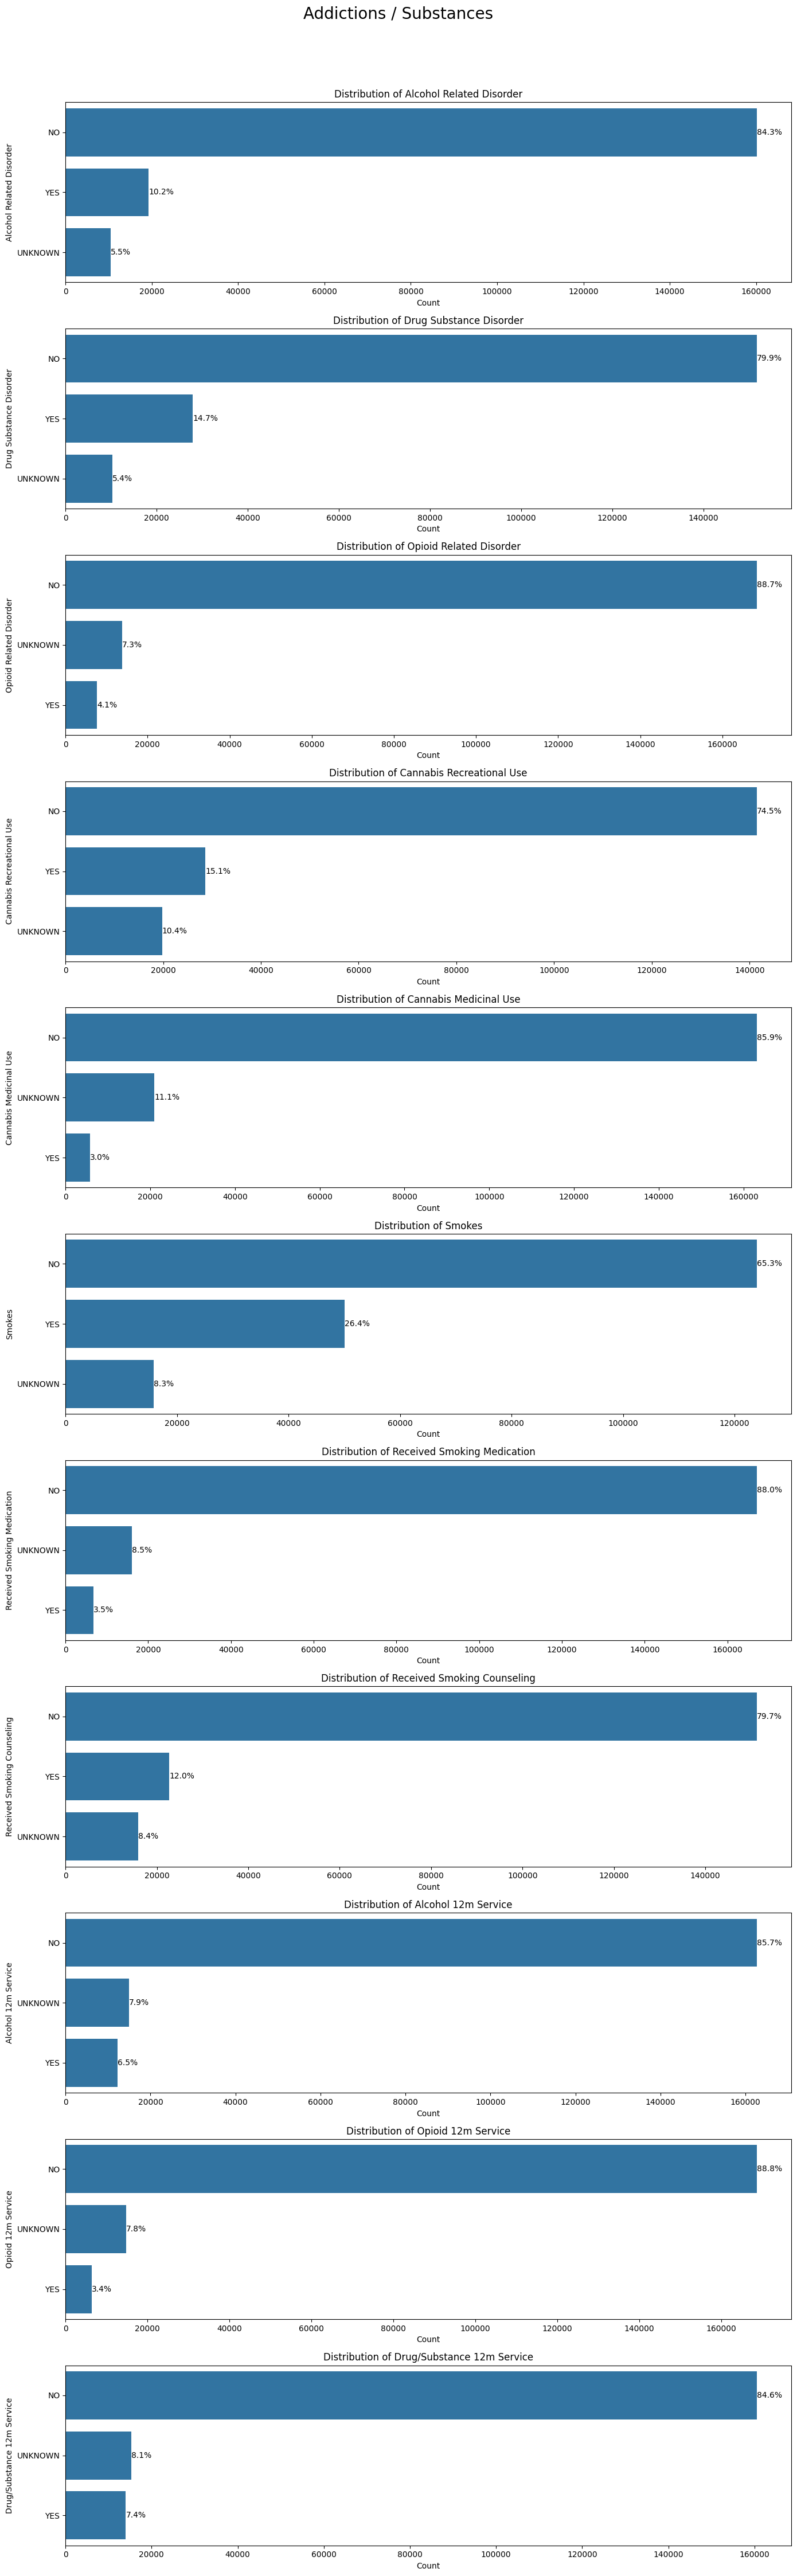

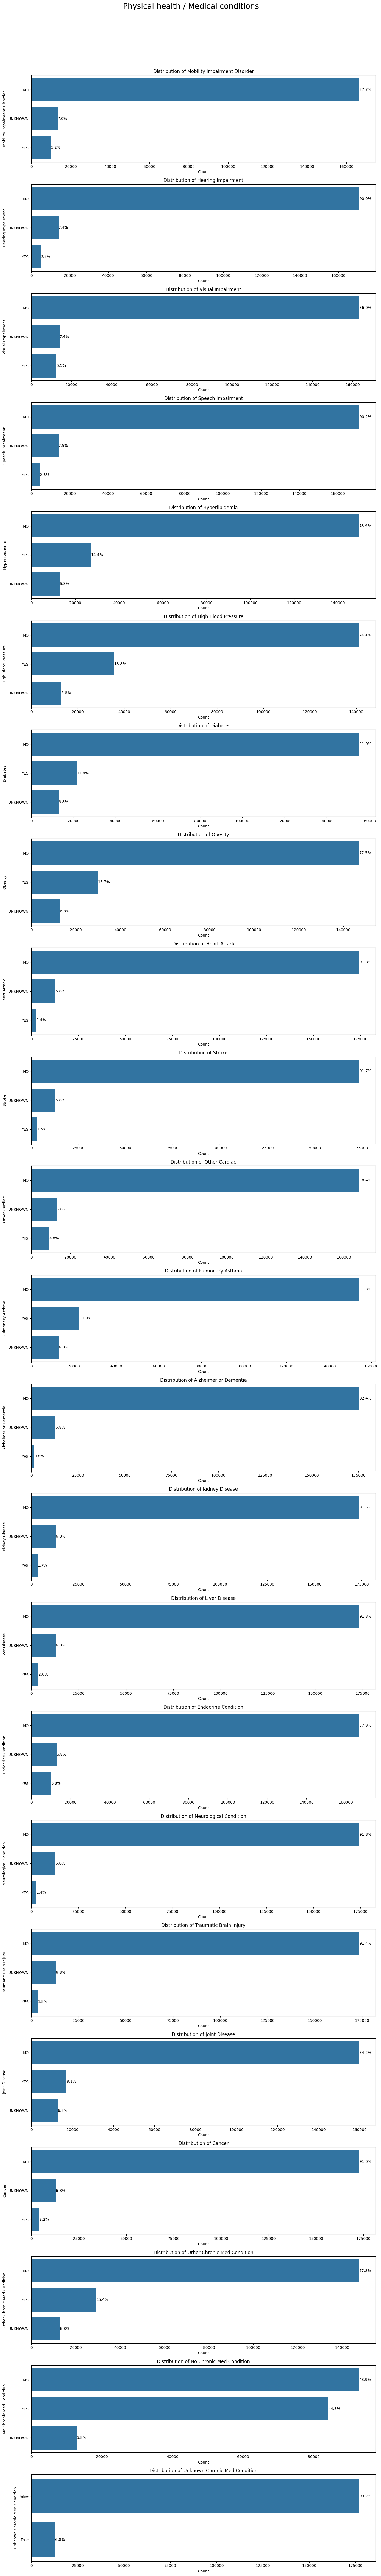

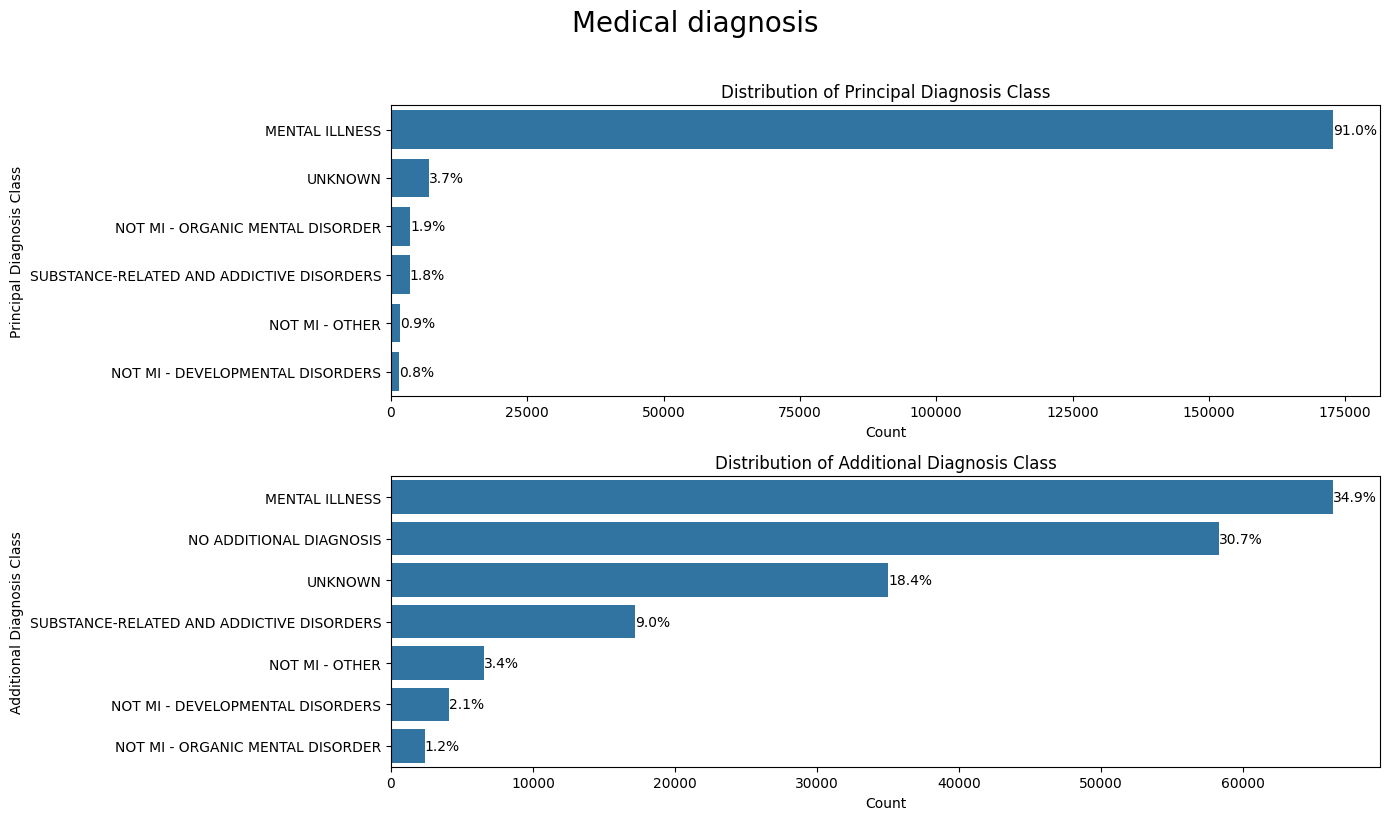

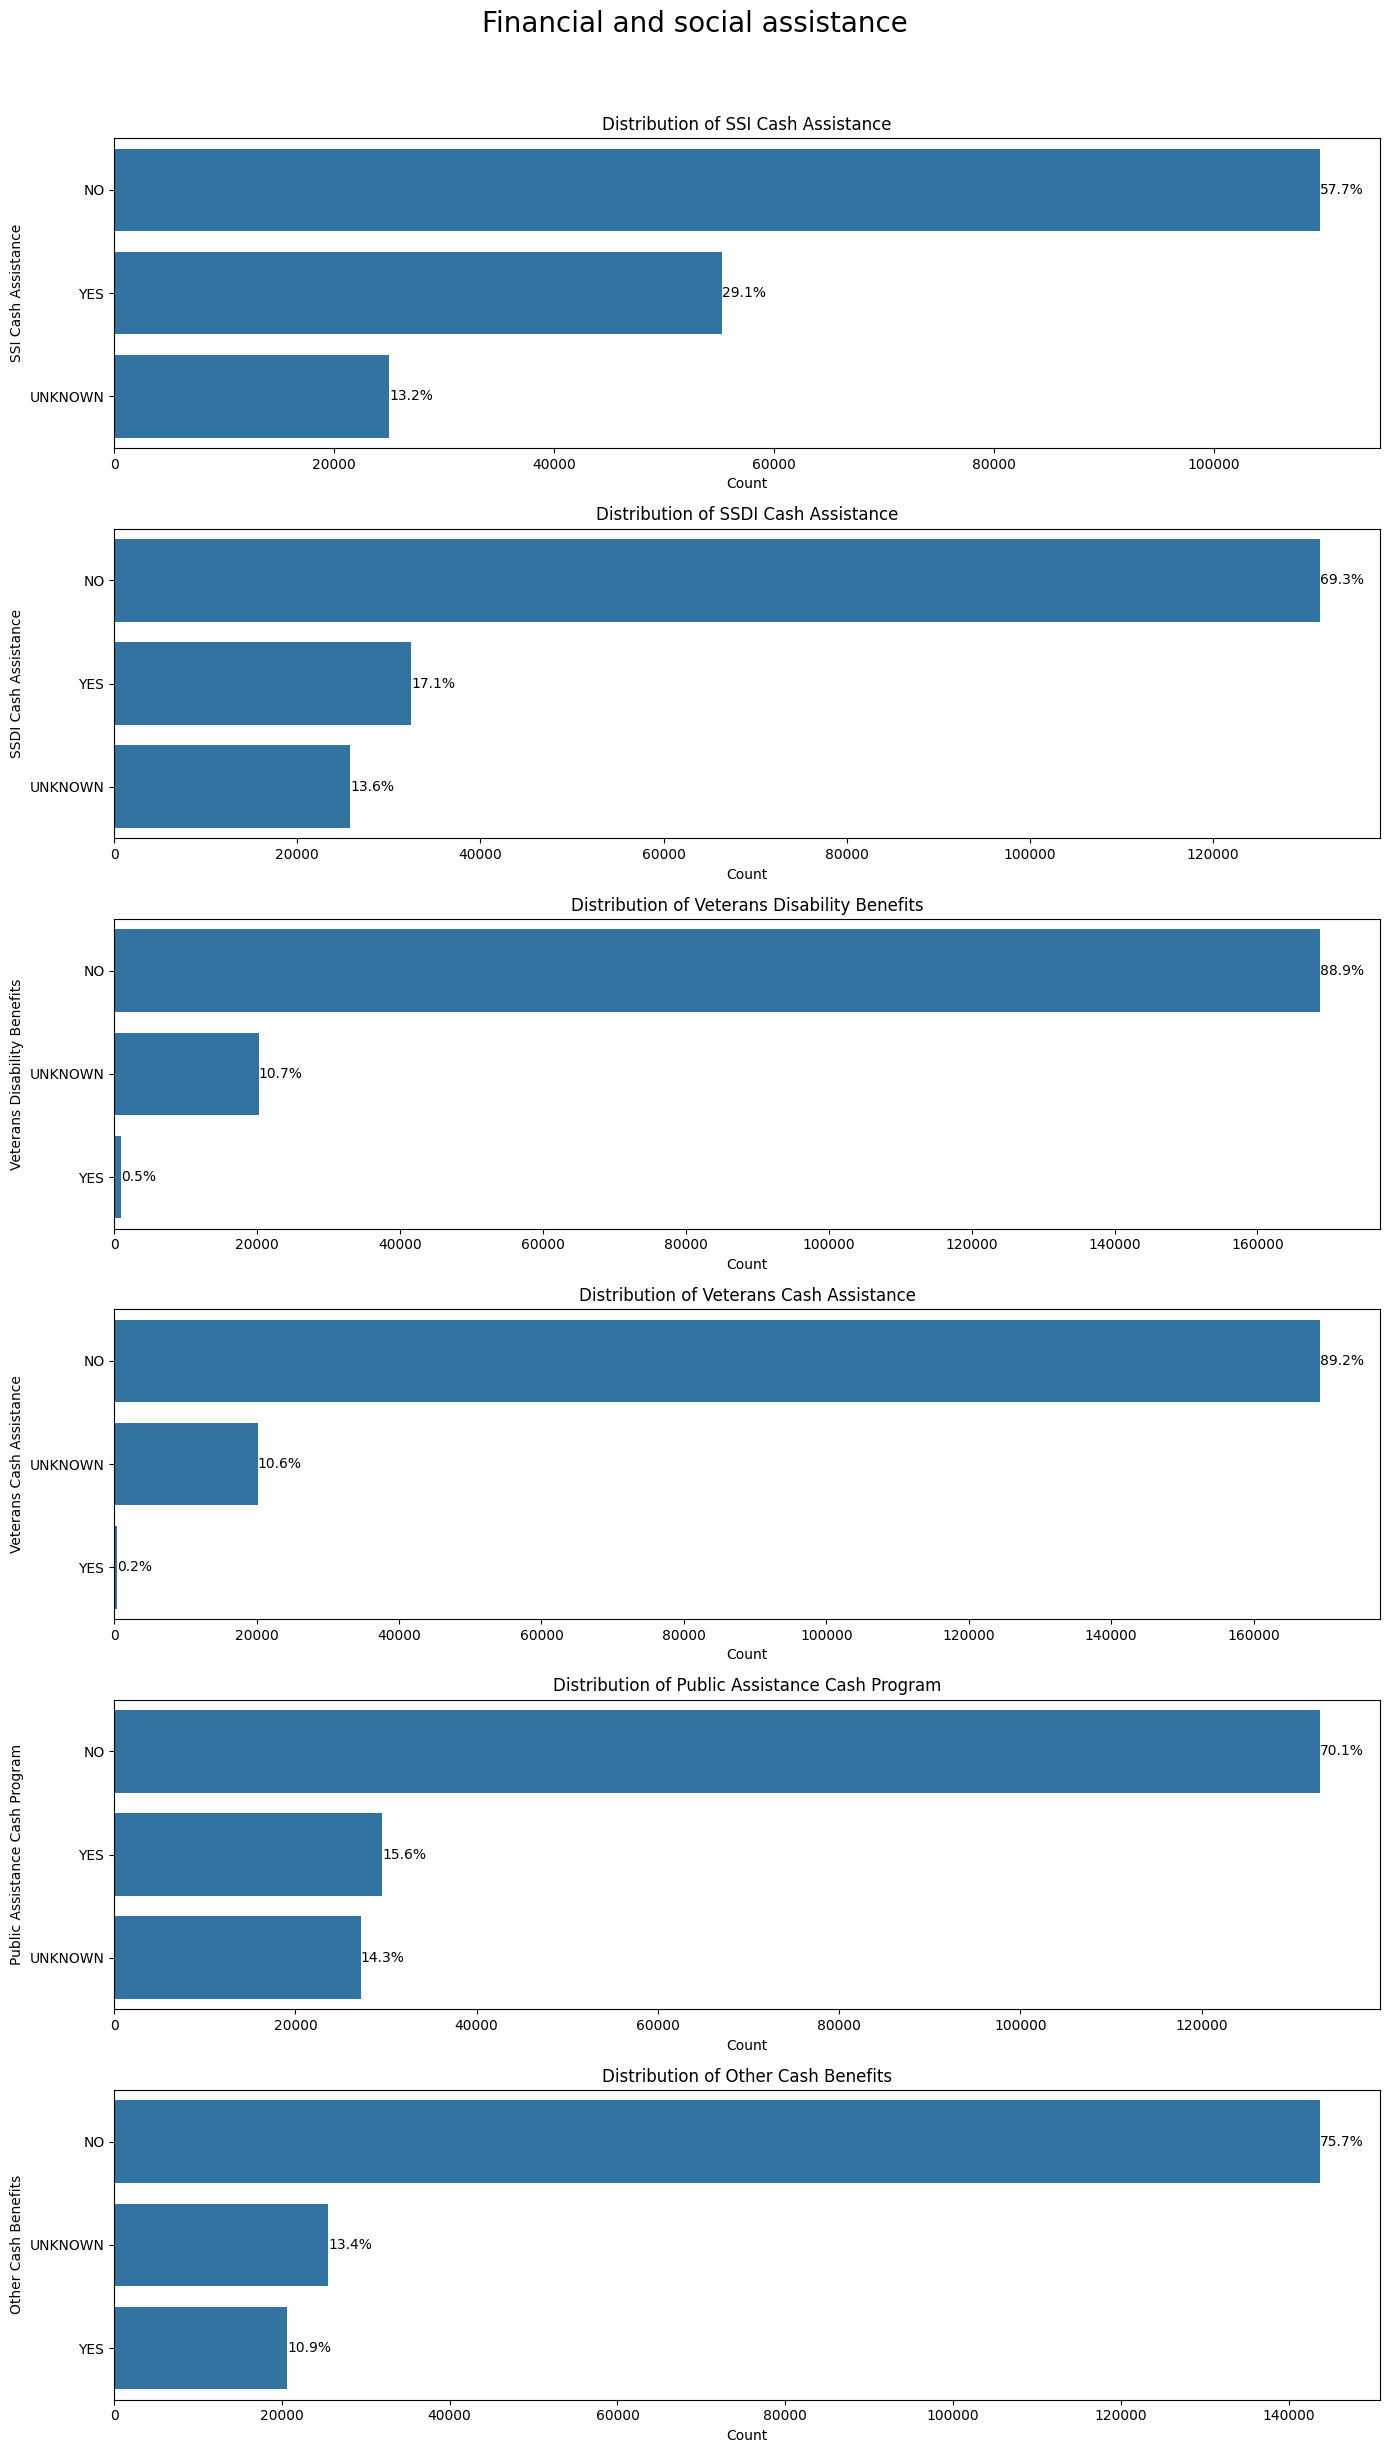

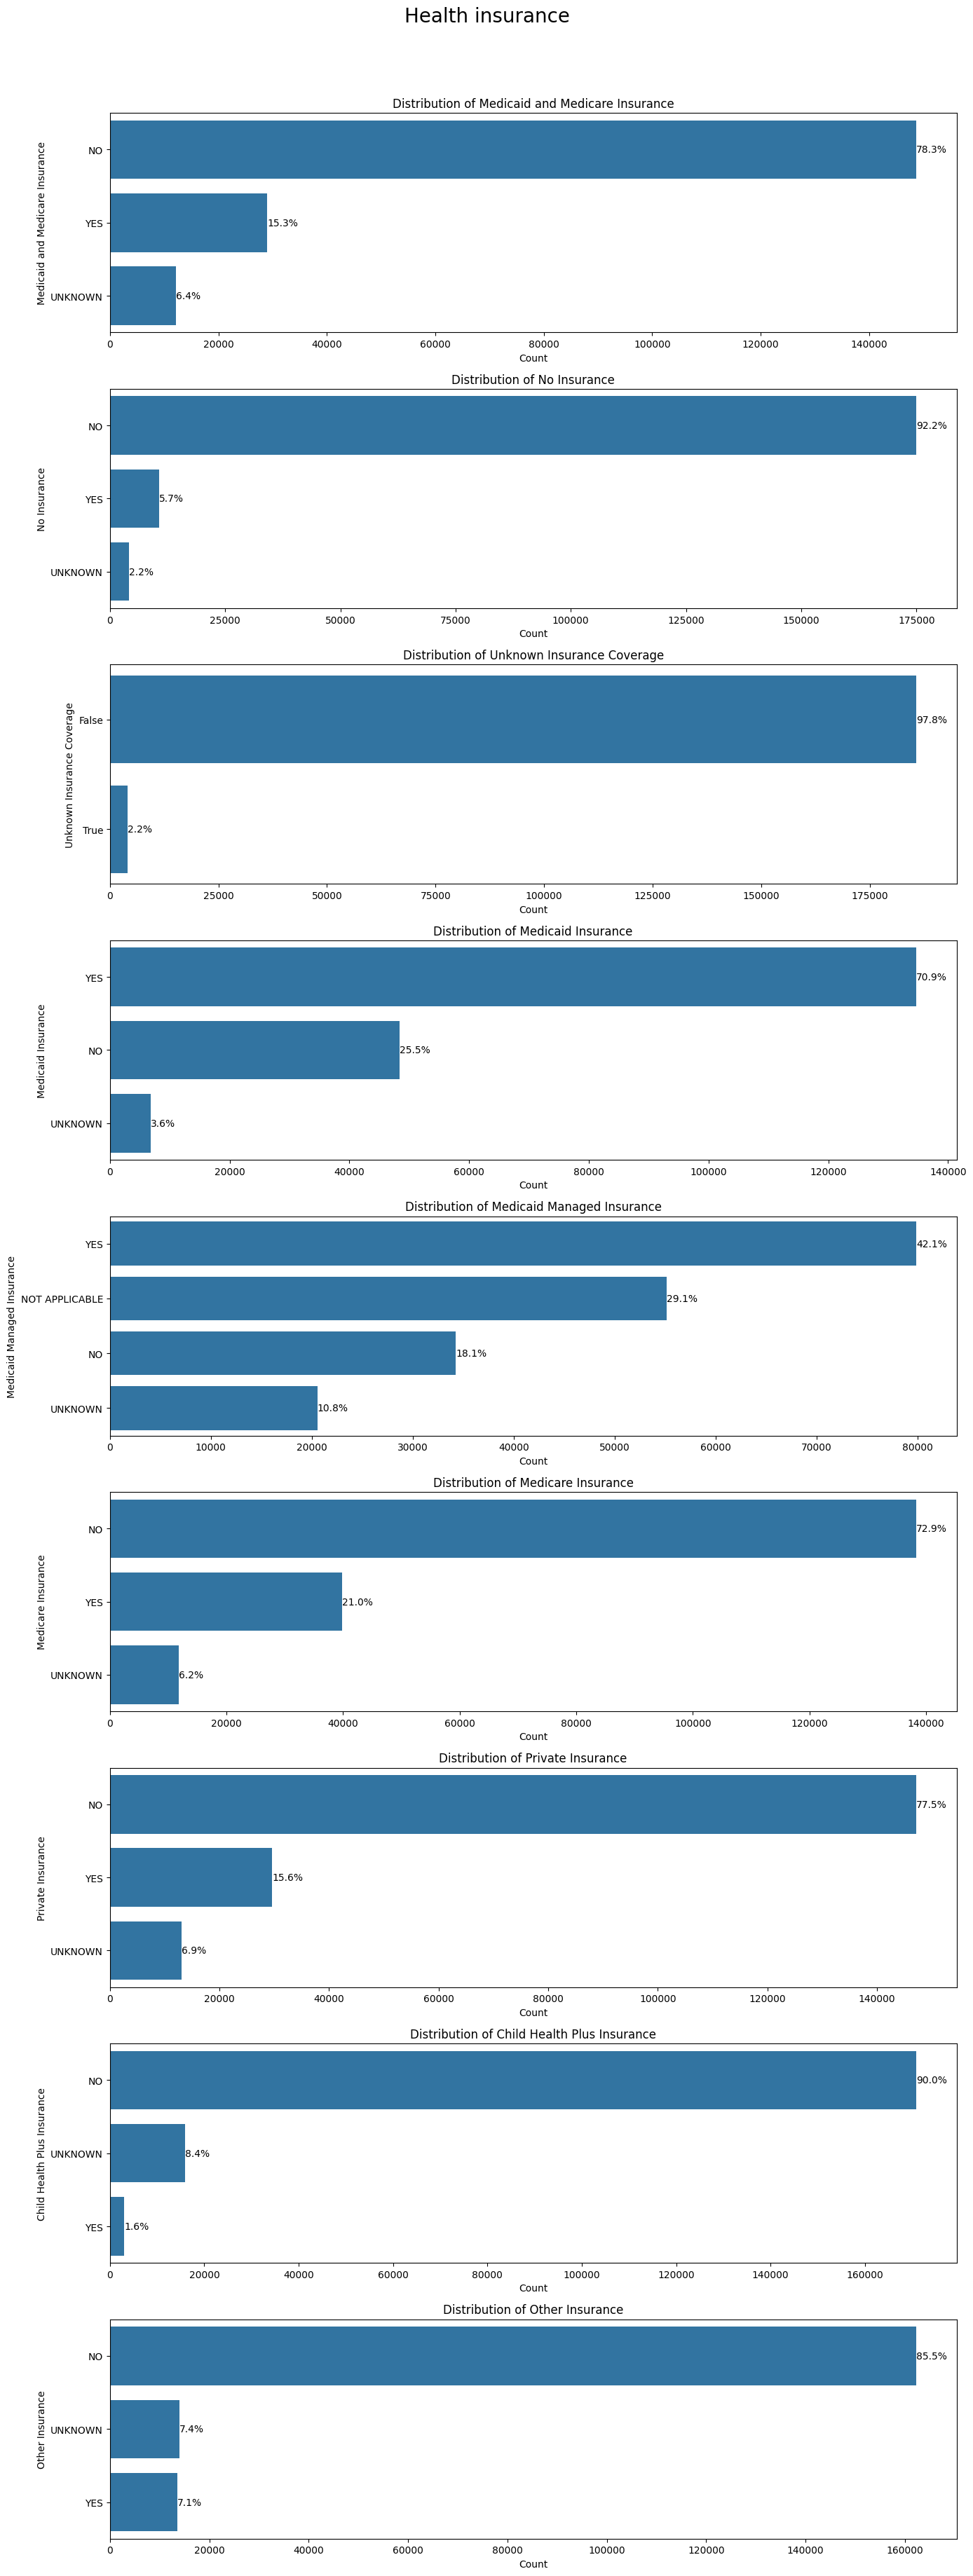

In [44]:
# Variables catégorielles
for cat, cols in categories.items():  
    if not cols:
        continue

    plt.figure(figsize=(14, 4 * len(cols)))

    for i, col in enumerate(cols, 1):
        plt.subplot(len(cols), 1, i)
        ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index)

        # Ajouter les pourcentages sur les barres
        total = len(df[col].dropna())
        for container in ax.containers:
            ax.bar_label(container, labels=[f"{(x/total*100):.1f}%" for x in container.datavalues])

        plt.title(f"Distribution of {col}")
        plt.xlabel("Count")

    plt.suptitle(f"{cat}", fontsize=20, y=1.02)
    plt.tight_layout()
    plt.show()


### Nettoyage des données

In [17]:
data = df.copy()
missing_values_list = [
    'DATA NOT AVAILABLE', 'UNKNOWN', 'NOT APPLICABLE'
] 

for col in cat_cols:
    data[col] = data[col].replace(missing_values_list, np.nan)

data.isna().sum().sort_values(ascending=False)


Number Of Hours Worked Each Week    155644
Special Education Services          153976
Medicaid Managed Insurance           75722
Religious Preference                 52621
Household Composition                42714
                                     ...  
Region Served                            0
Race                                     0
Employment Status                        0
Unknown Chronic Med Condition            0
Unknown Insurance Coverage               0
Length: 73, dtype: int64

Il faut se décider sur le pourcentage acceptable de valeurs manquantes puis les retirer (ici on conserve à hauteur de 40%)

In [18]:
data = data.drop(columns=["Number Of Hours Worked Each Week", "Special Education Services"], axis=1)

In [19]:
data.isna().sum().sort_values(ascending=False)

Medicaid Managed Insurance        75722
Religious Preference              52621
Household Composition             42714
Additional Diagnosis Class        35007
Public Assistance Cash Program    27212
                                  ...  
Region Served                         0
Employment Status                     0
Race                                  0
Unknown Chronic Med Condition         0
Unknown Insurance Coverage            0
Length: 71, dtype: int64

AJOUTER ICI LE TRAITEMENT DES VALEURS "NULLES"

Retirer certaines colonnes et feature engineering sur les autres

In [20]:
# On remplace les valeurs manquantes par la modalité la plus fréquente
for col in data.columns:
    if col in cat_cols:
        data[col] = data[col].fillna(data[col].mode()[0])

data.isna().sum().sort_values(ascending=False)

Program Category               0
Region Served                  0
Age Group                      0
Sex                            0
Transgender                    0
                              ..
Medicare Insurance             0
Private Insurance              0
Child Health Plus Insurance    0
Other Insurance                0
Criminal Justice Status        0
Length: 71, dtype: int64

Valeurs uniques de la cible : ['YES' 'NO']

Répartition de la cible :
Mental Illness
YES    0.971372
NO     0.028628
Name: proportion, dtype: float64


C:\Users\maud.busserolles\AppData\Local\Temp\ipykernel_27112\3491839999.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=data, palette="Set2")


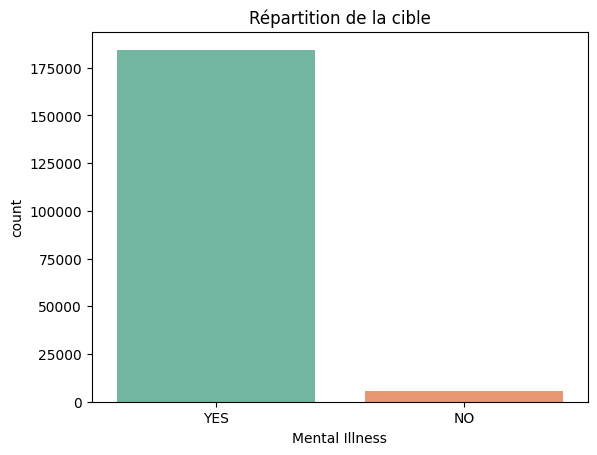

In [21]:
# Vérification de la colonne cible (ici "Mental Illness", adapte si besoin)
print("Valeurs uniques de la cible :", data[target_col].unique())
print("\nRépartition de la cible :")
print(data[target_col].value_counts(normalize=True))

# Visualisation de la distribution de la cible
sns.countplot(x=target_col, data=data)
plt.title("Répartition de la cible")
plt.show()

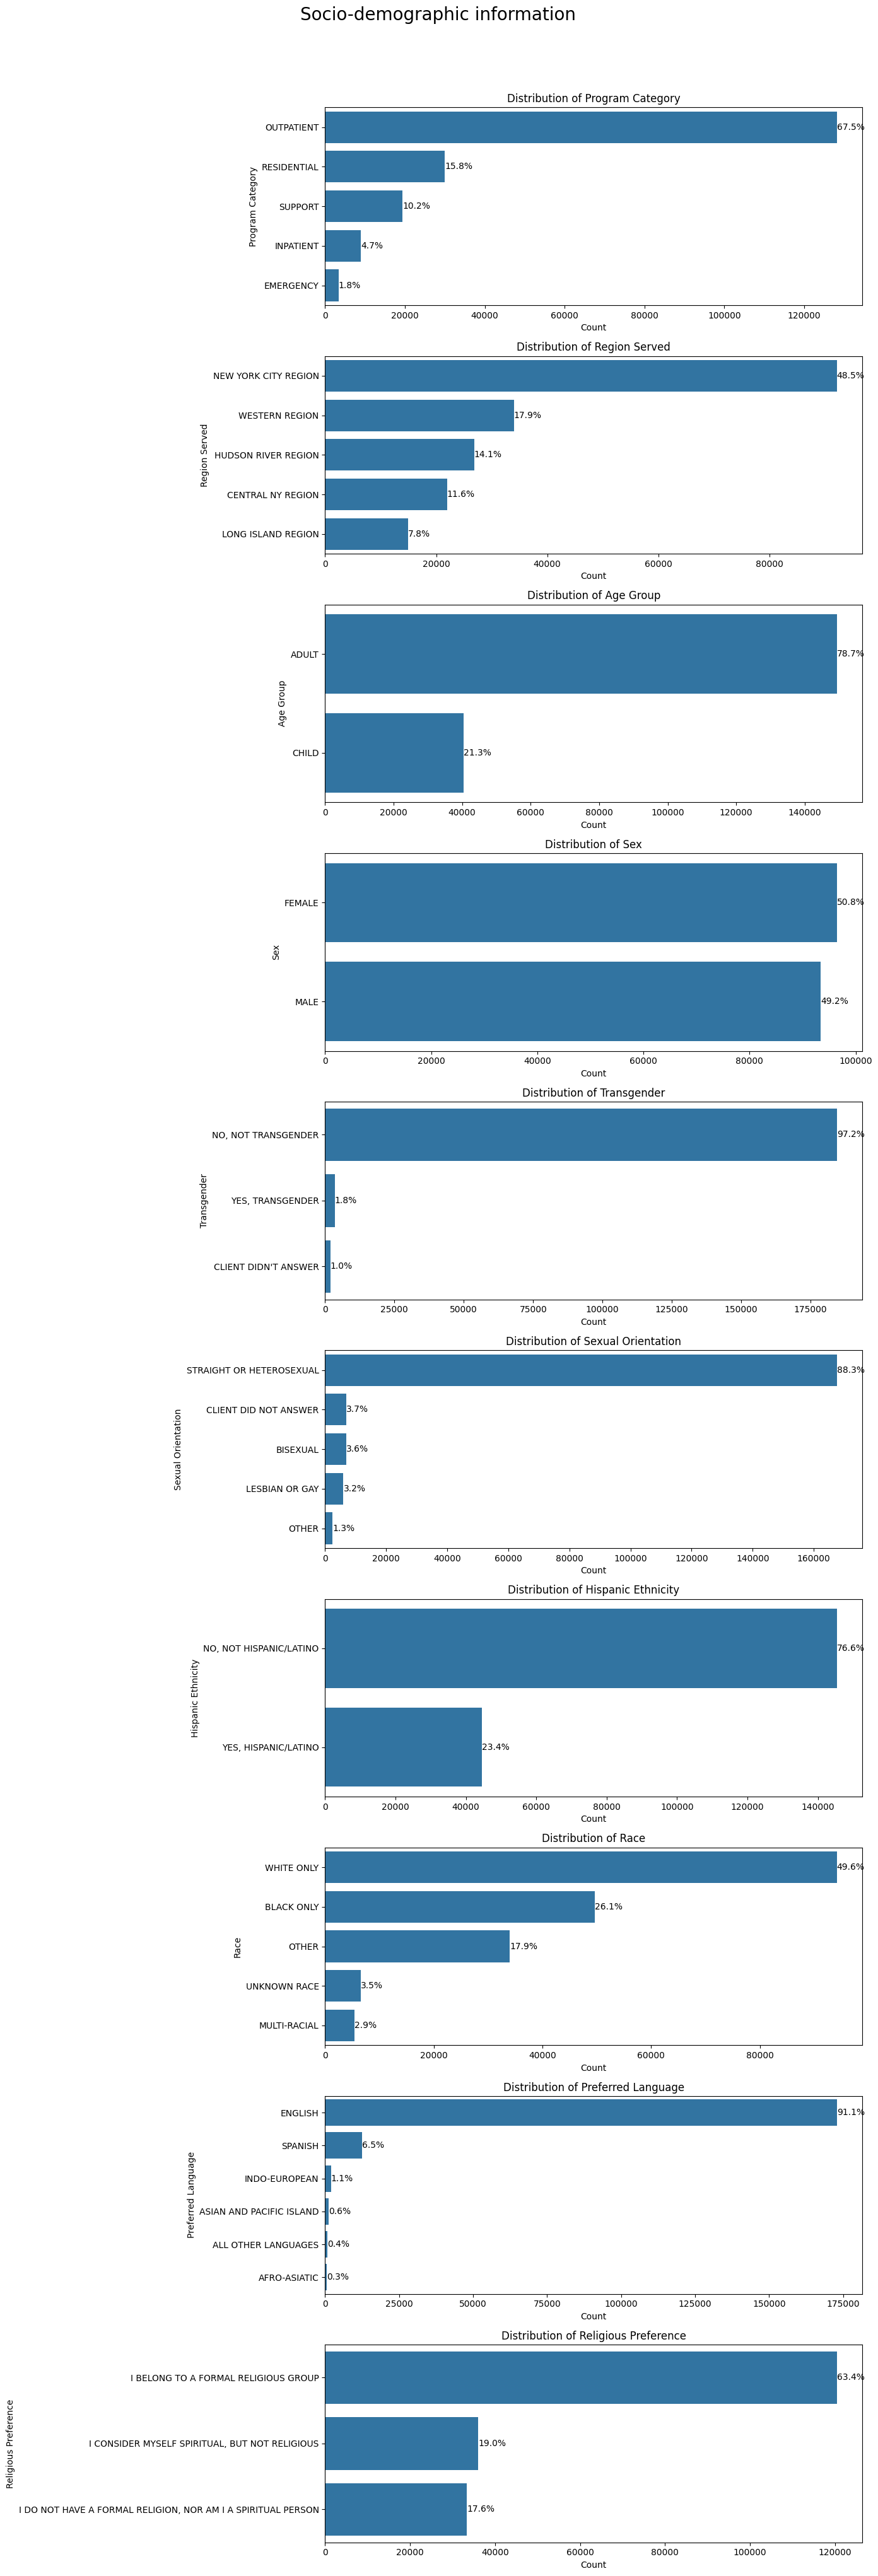

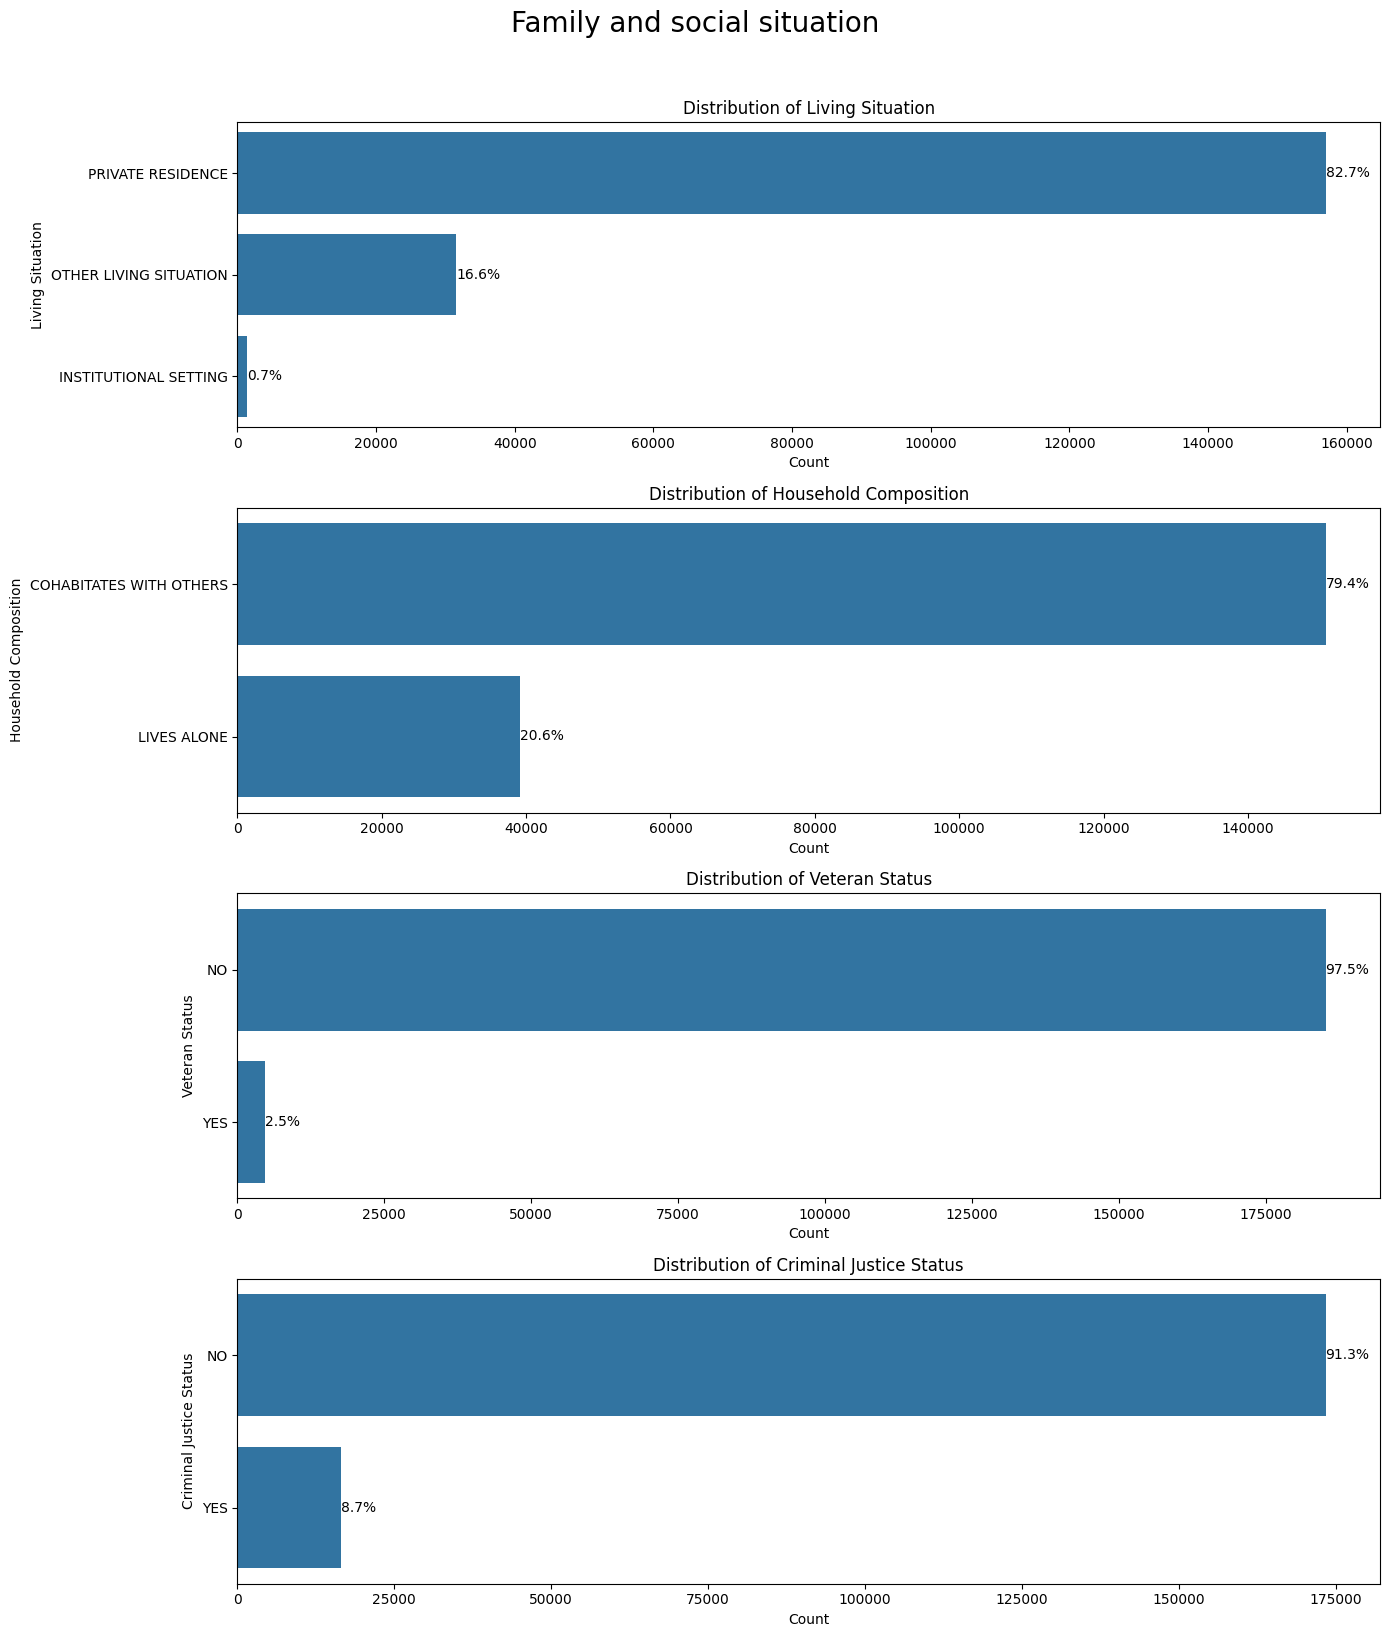

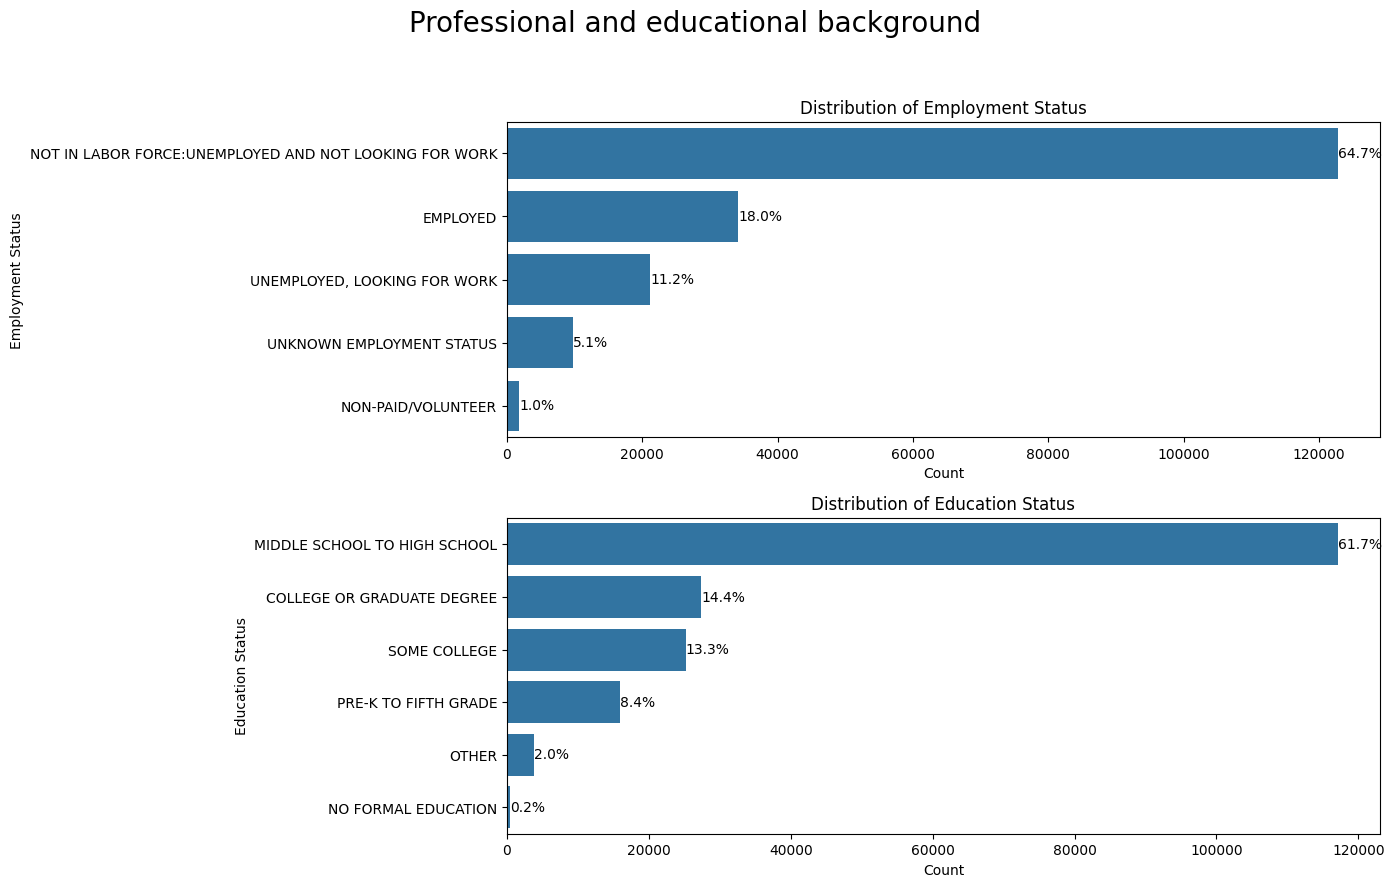

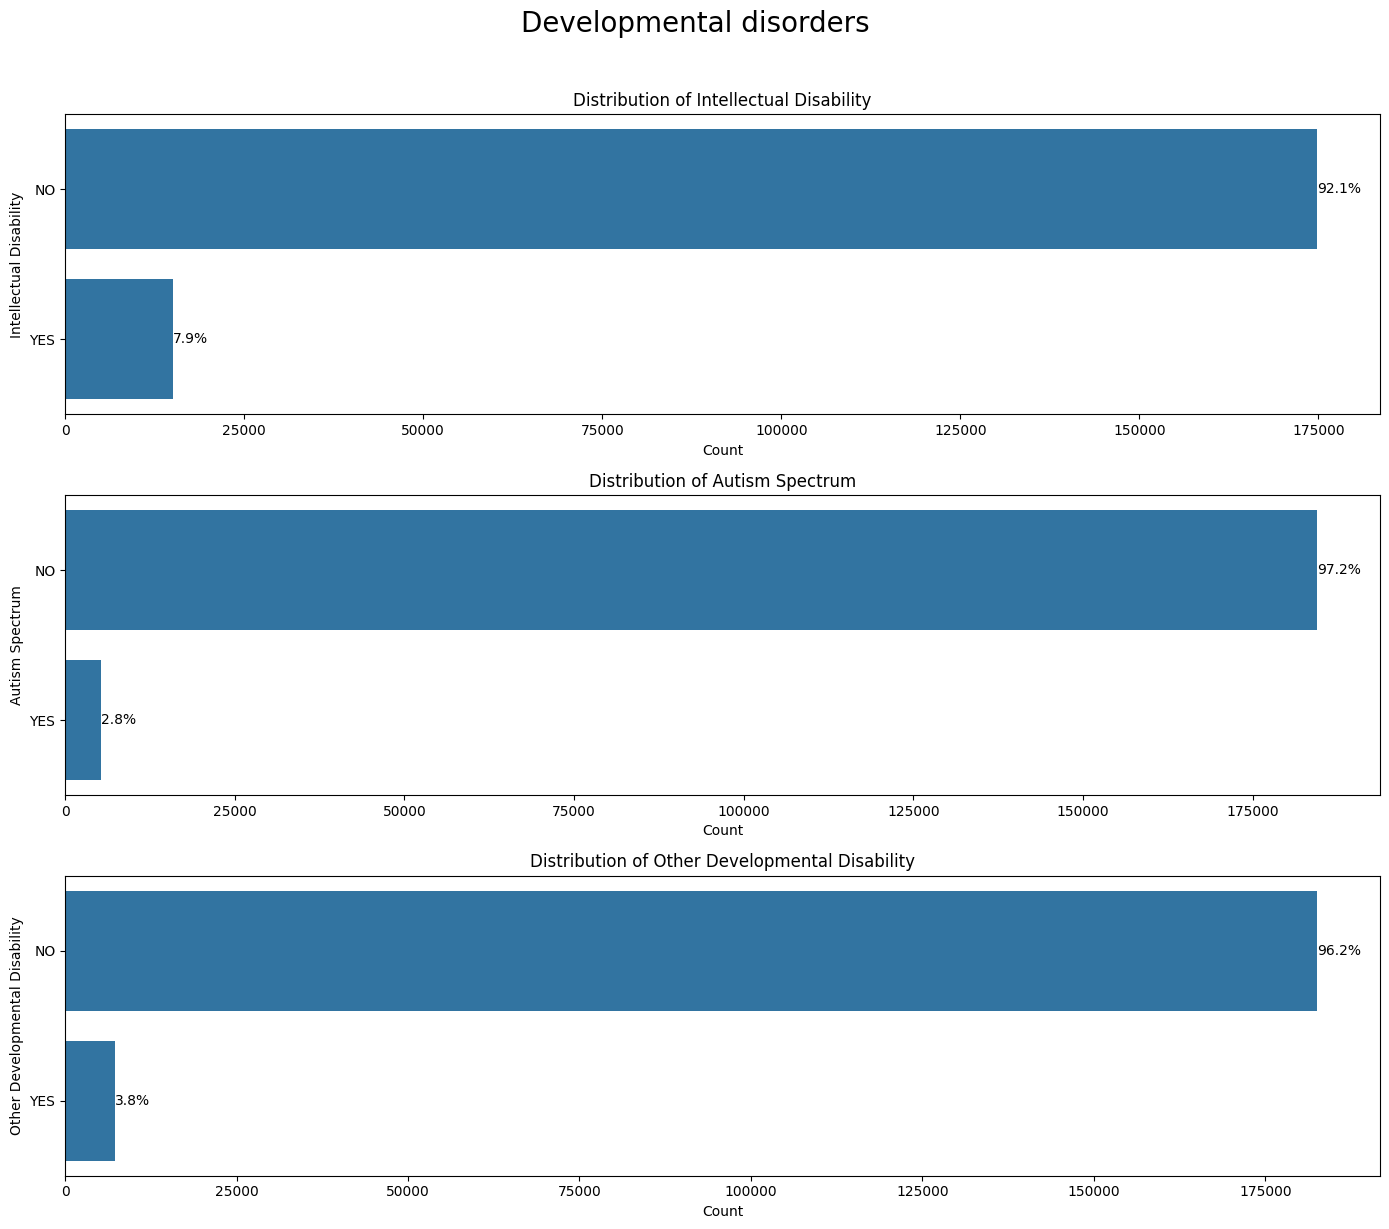

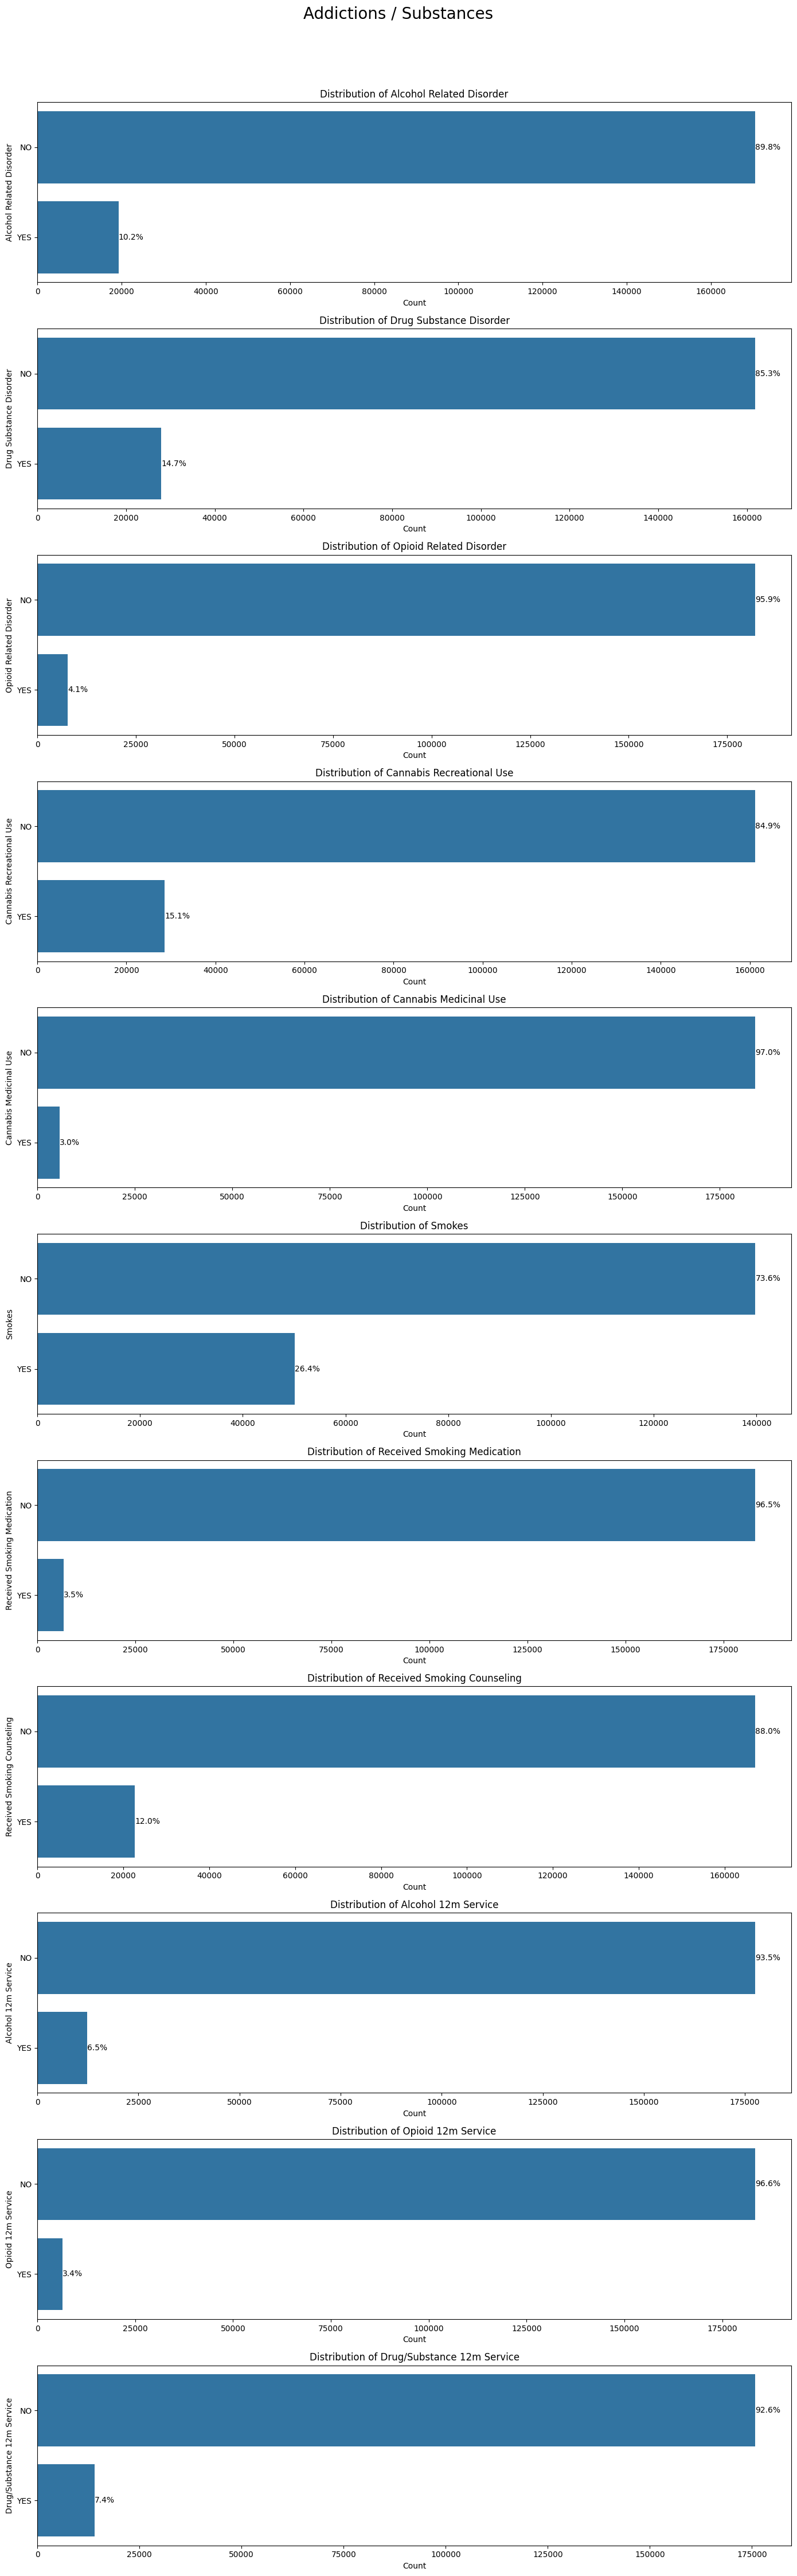

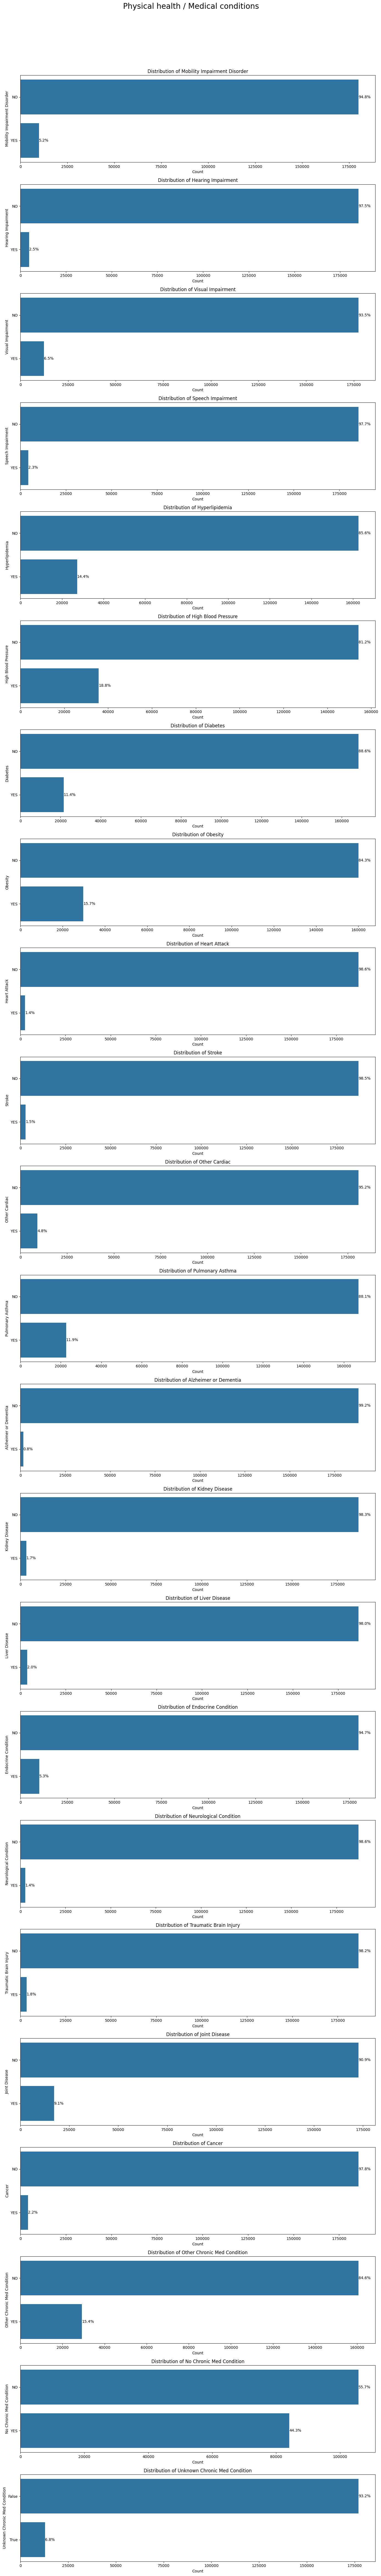

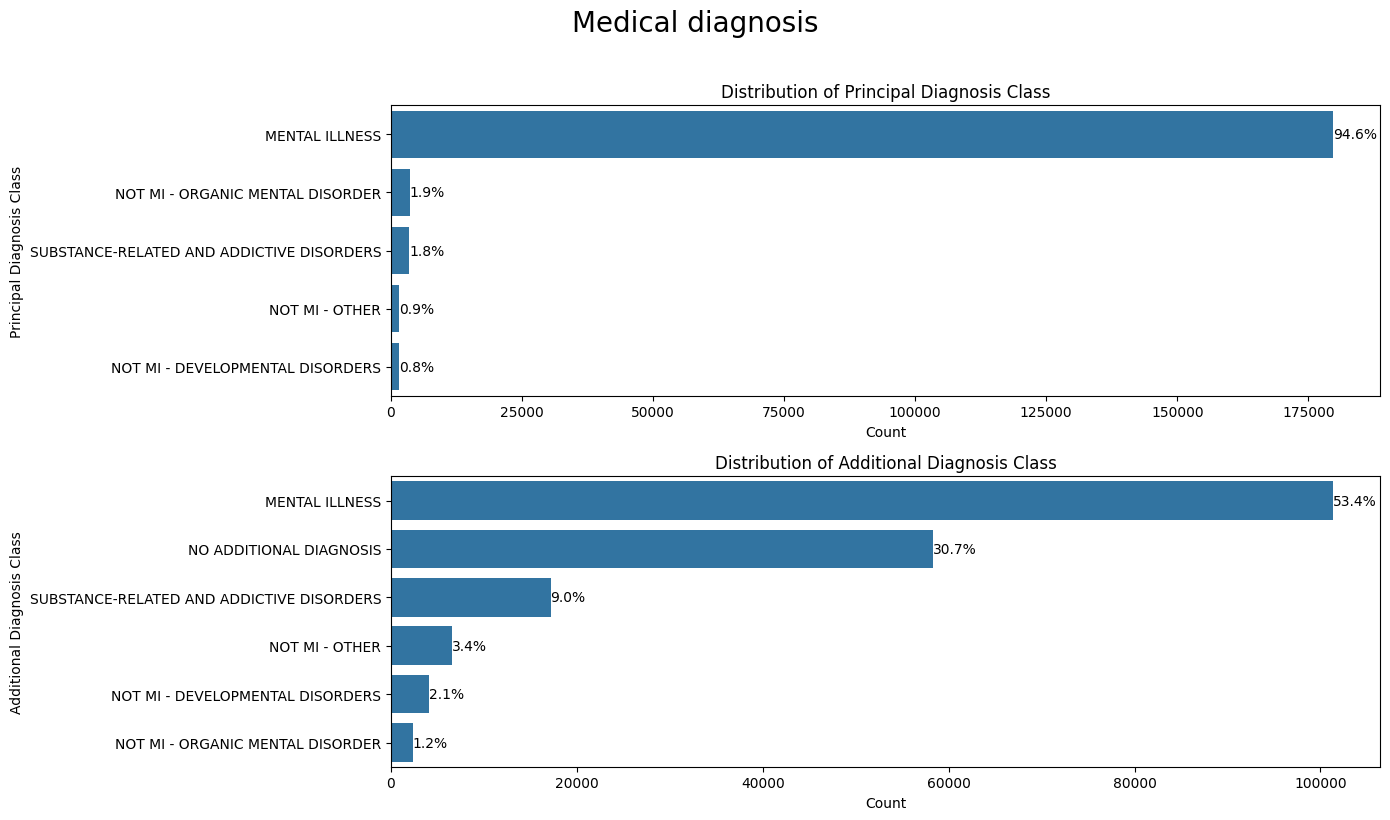

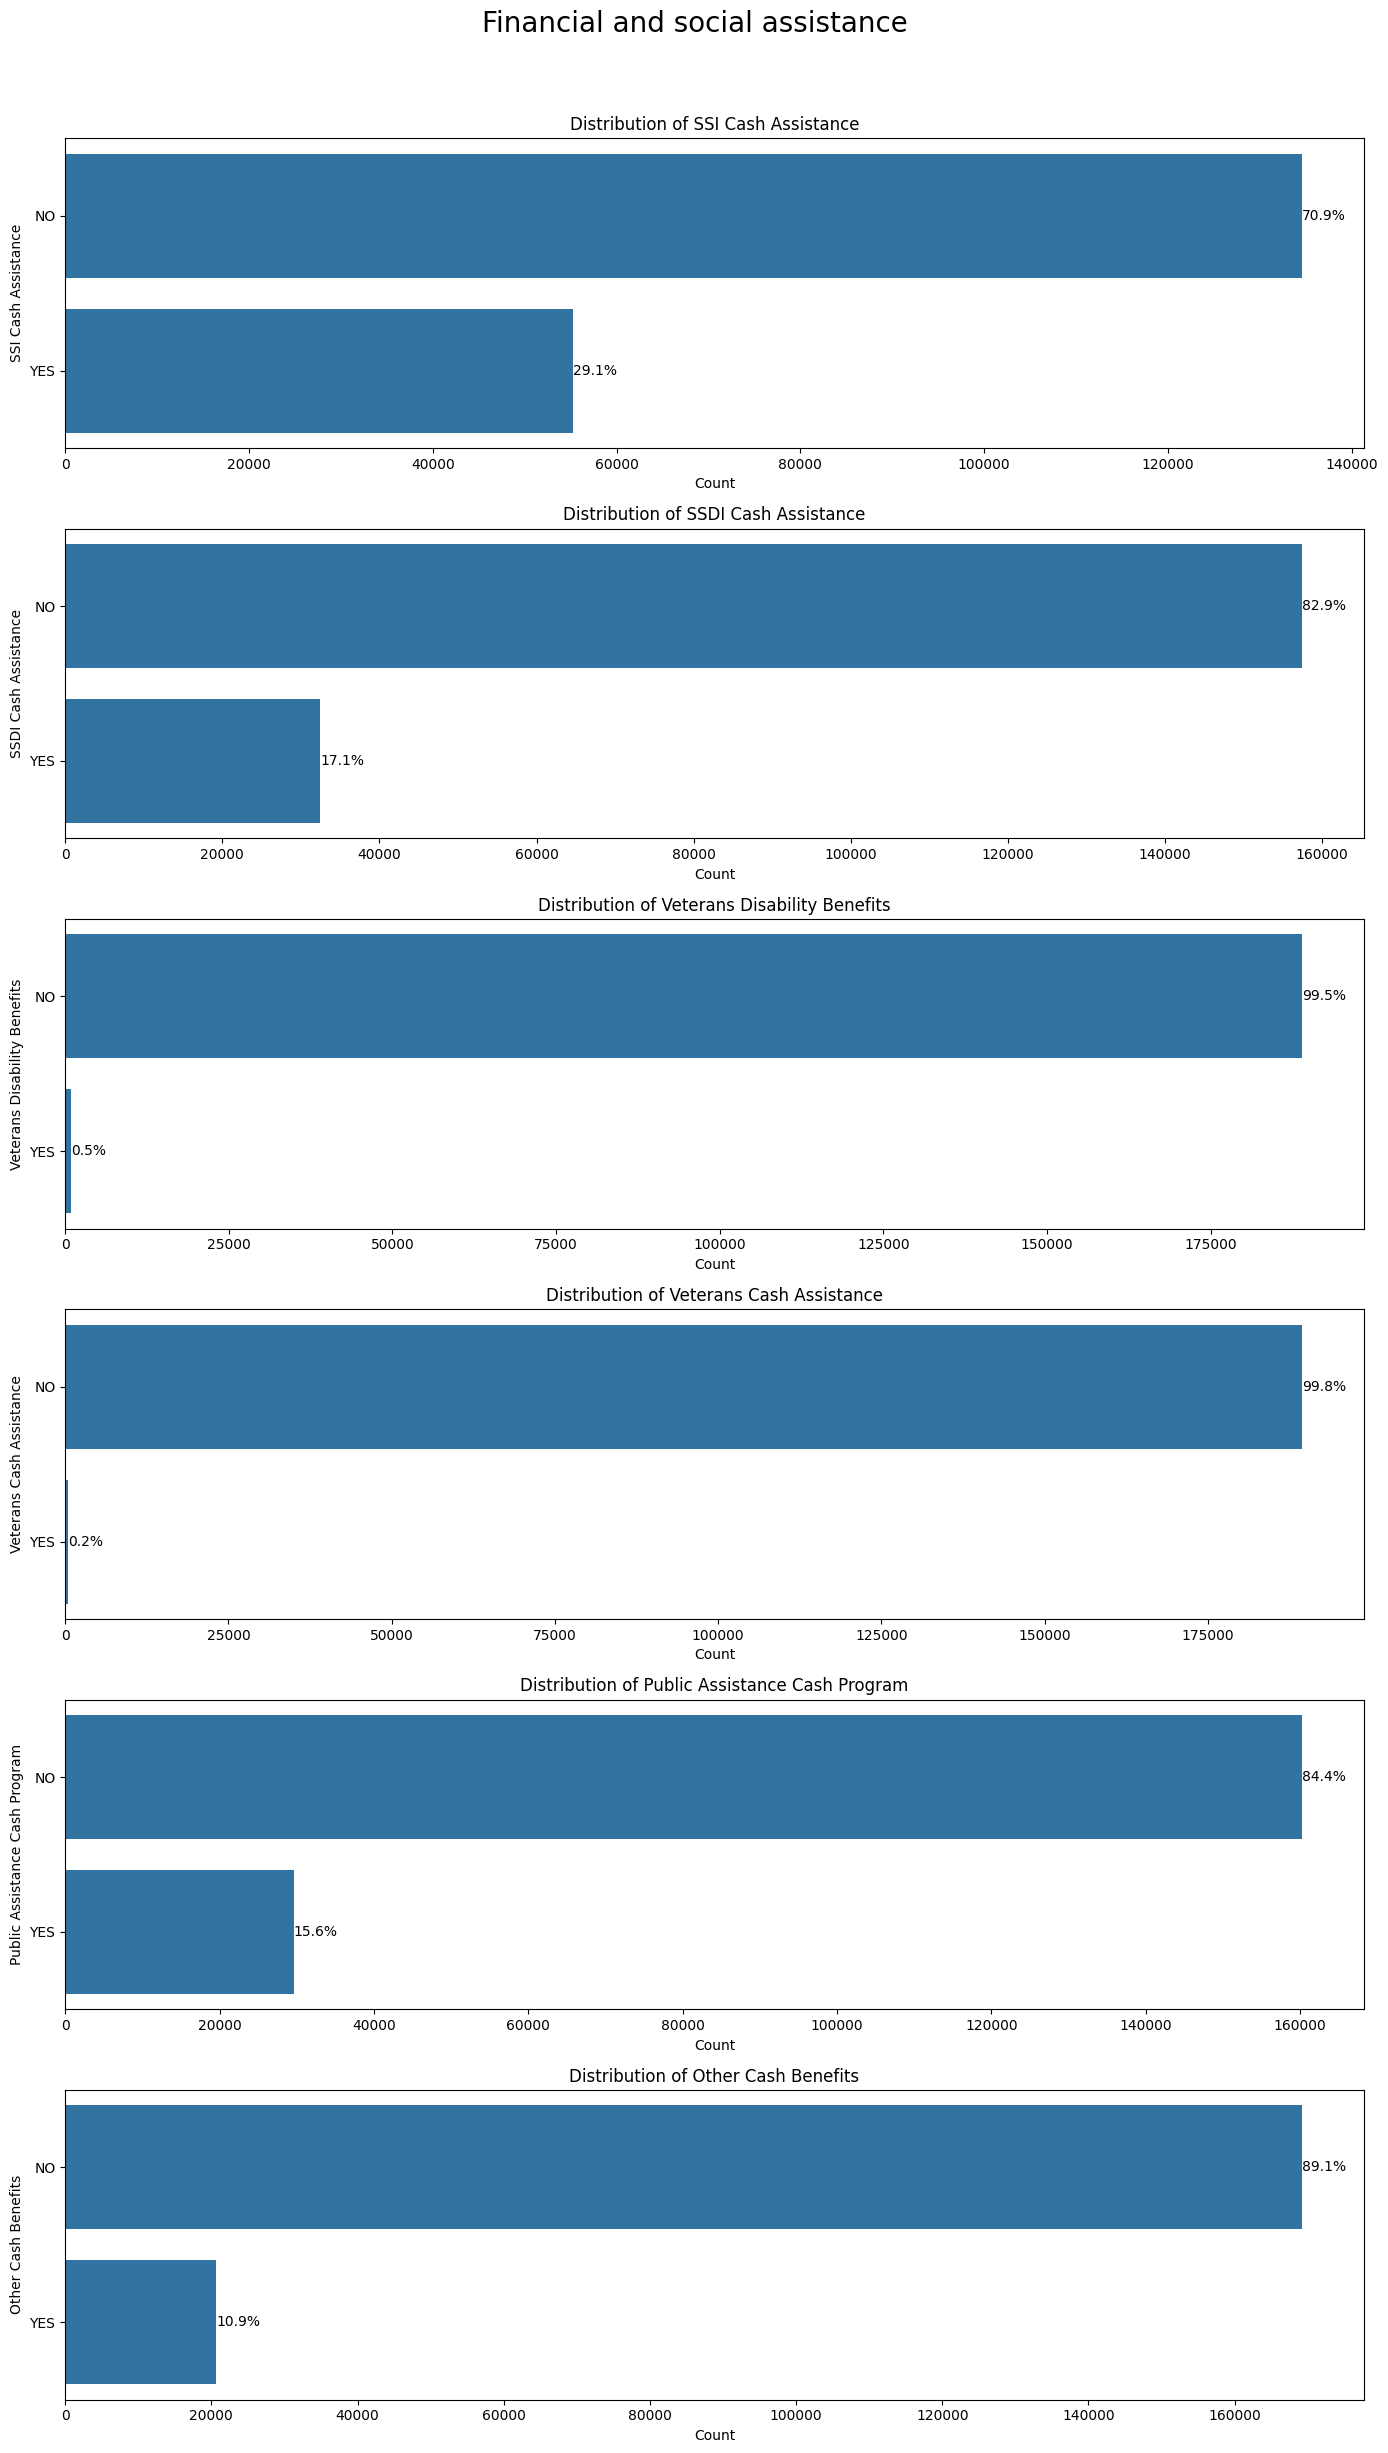

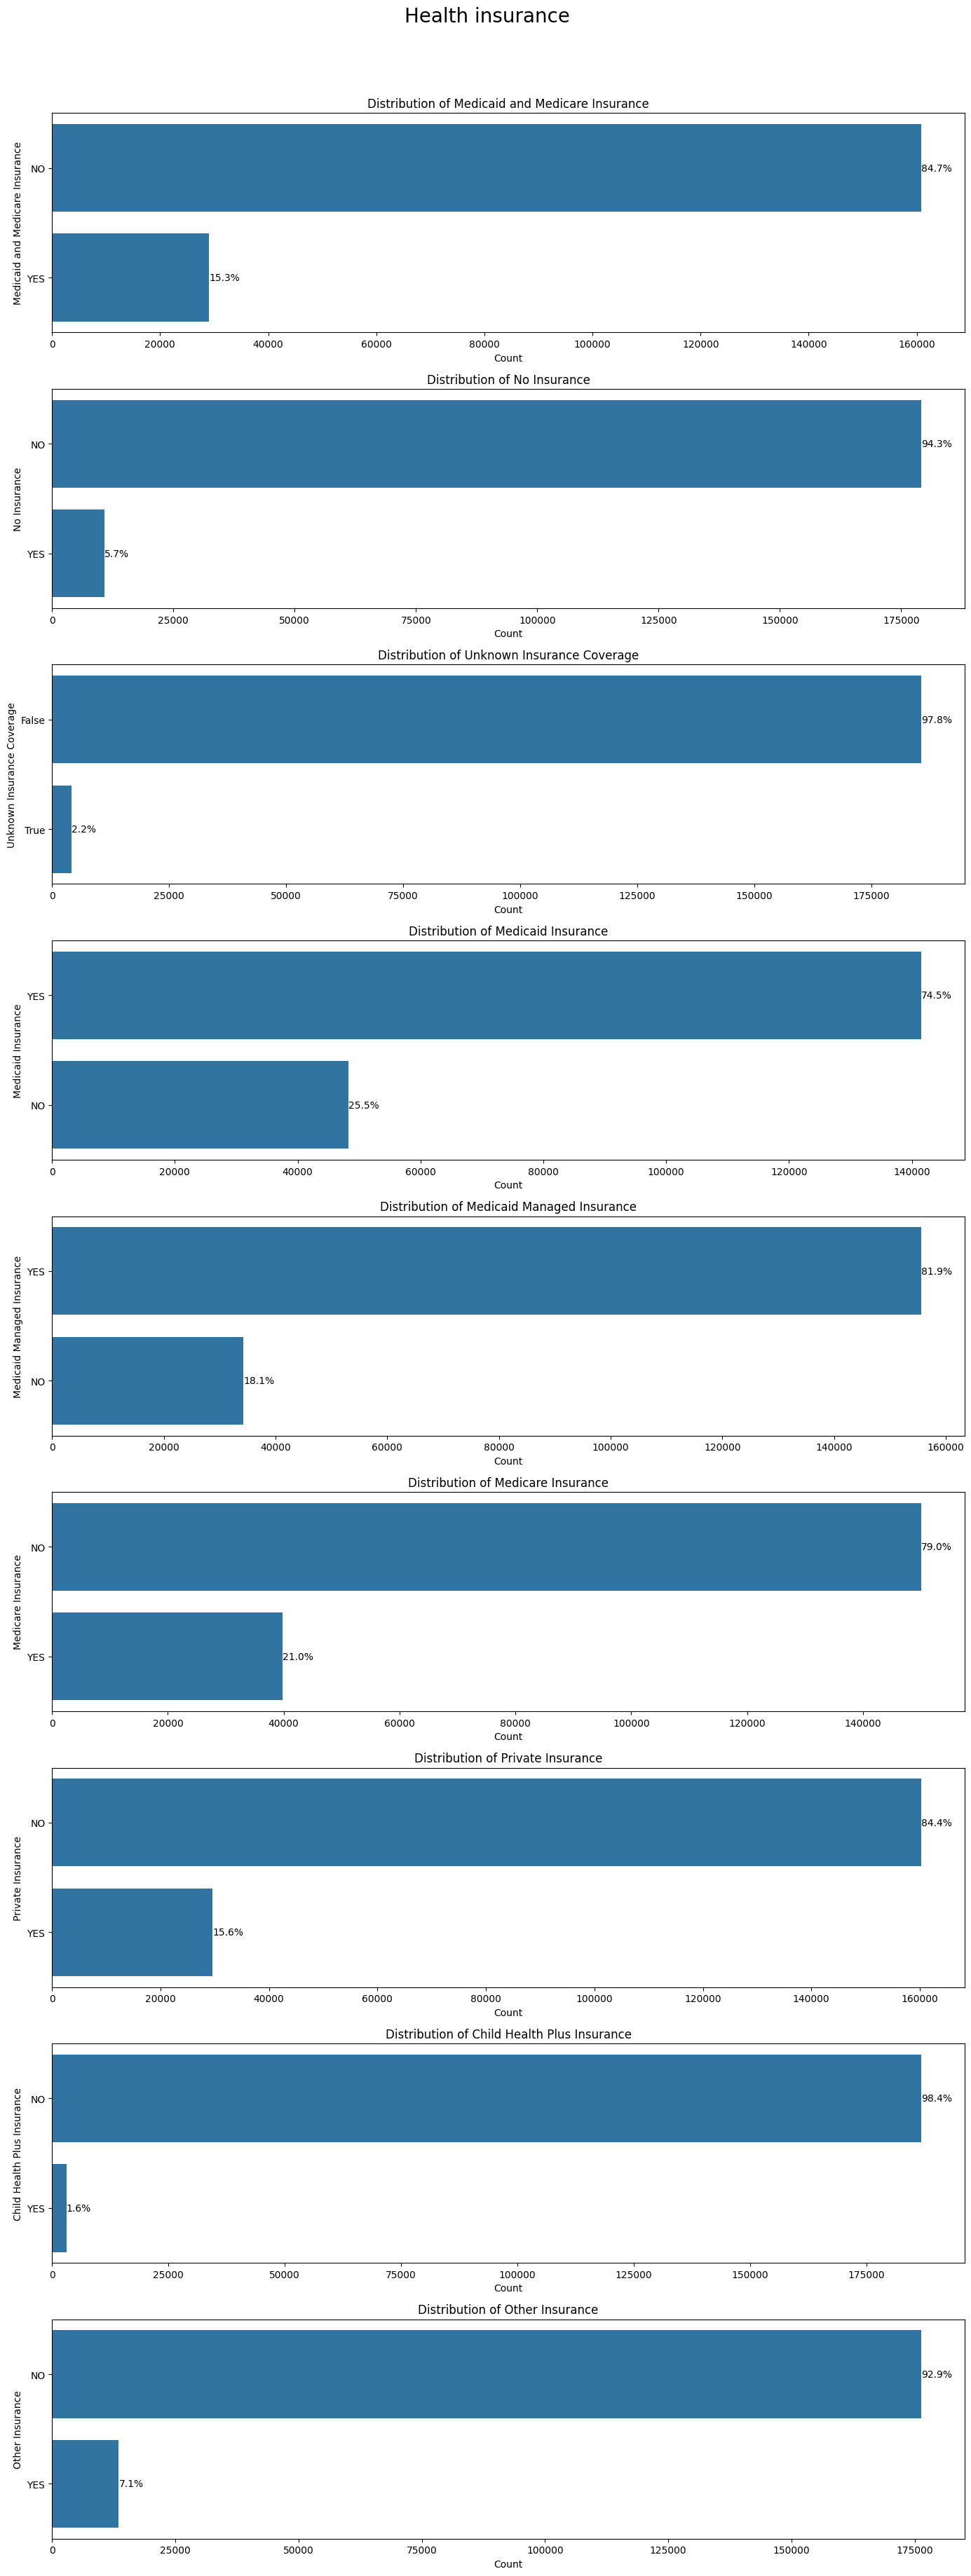

In [40]:
# Variables catégorielles
for cat, cols in categories.items():  
    if not cols:
        continue

    plt.figure(figsize=(14, 4 * len(cols)))

    plot_idx = 1
    for col in cols:
        if col not in data.columns:
            continue
        plt.subplot(len(cols), 1, plot_idx)
        ax = sns.countplot(y=col, data=data, order=data[col].value_counts().index)

        # Ajouter les pourcentages sur les barres
        total = len(data[col].dropna())
        for container in ax.containers:
            ax.bar_label(container, labels=[f"{(x/total*100):.1f}%" for x in container.datavalues])

        plt.title(f"Distribution of {col}")
        plt.xlabel("Count")
        plot_idx += 1

    plt.suptitle(f"{cat}", fontsize=20, y=1.02)
    plt.tight_layout()
    plt.show()

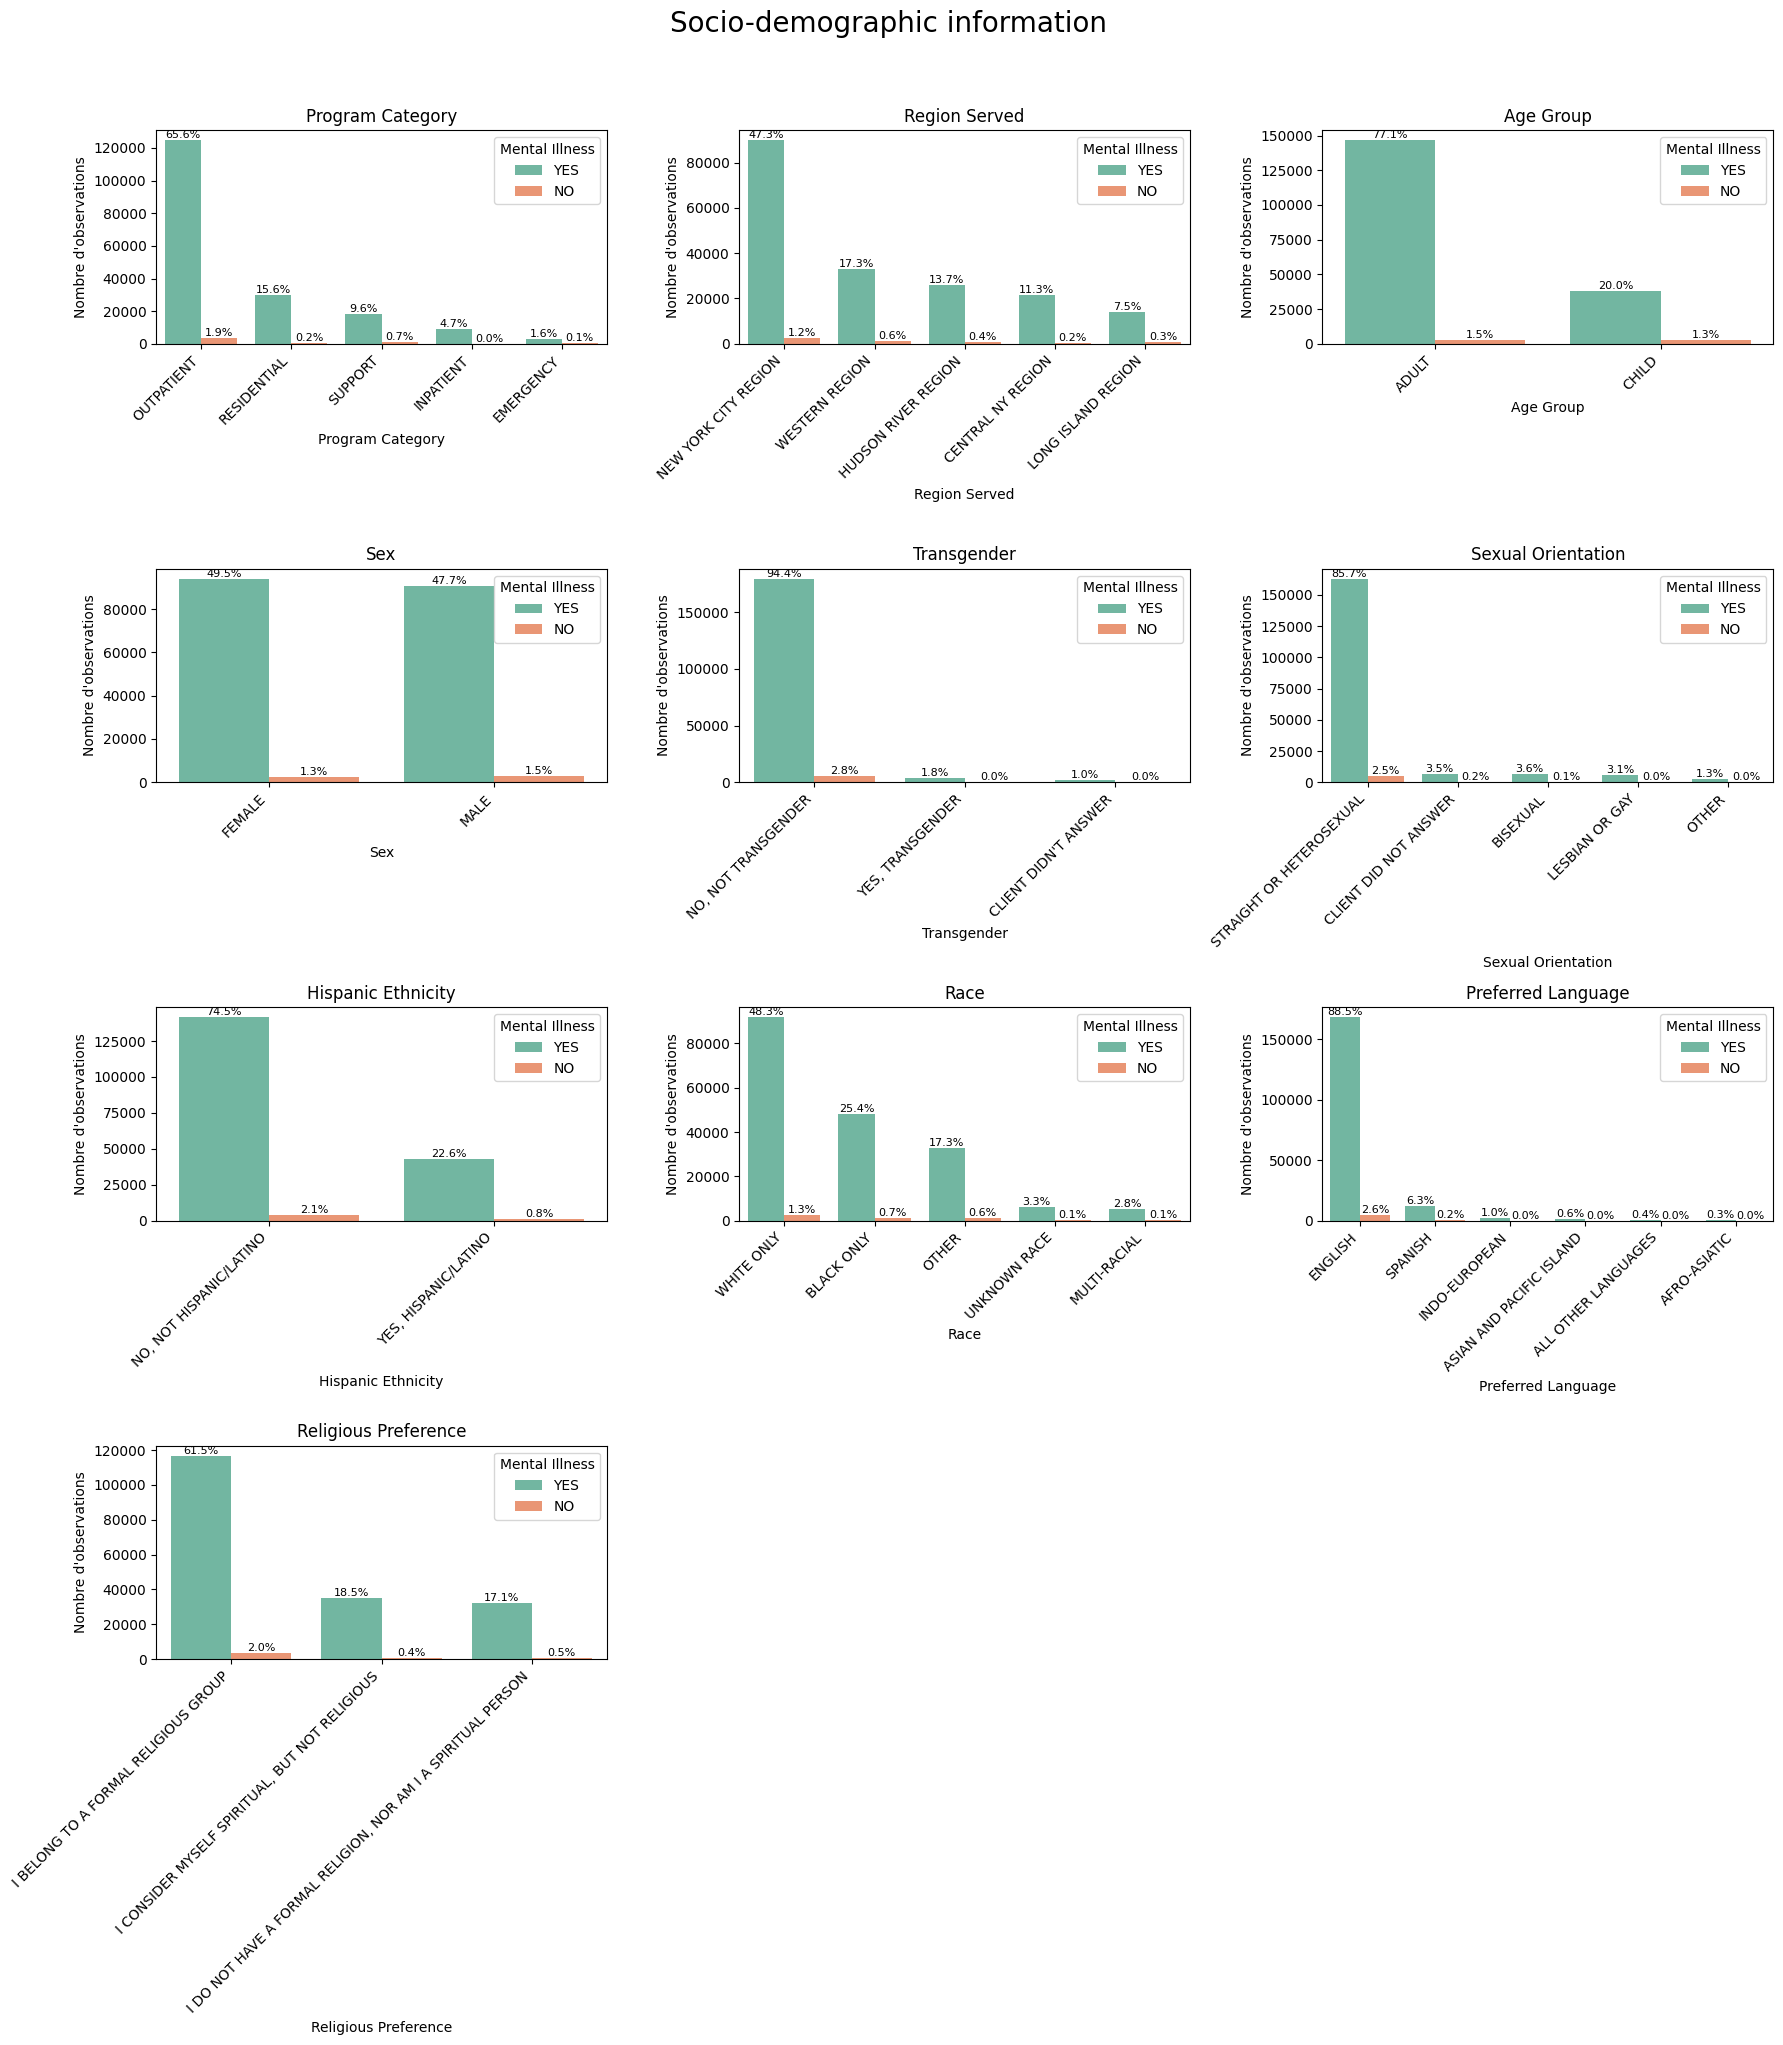

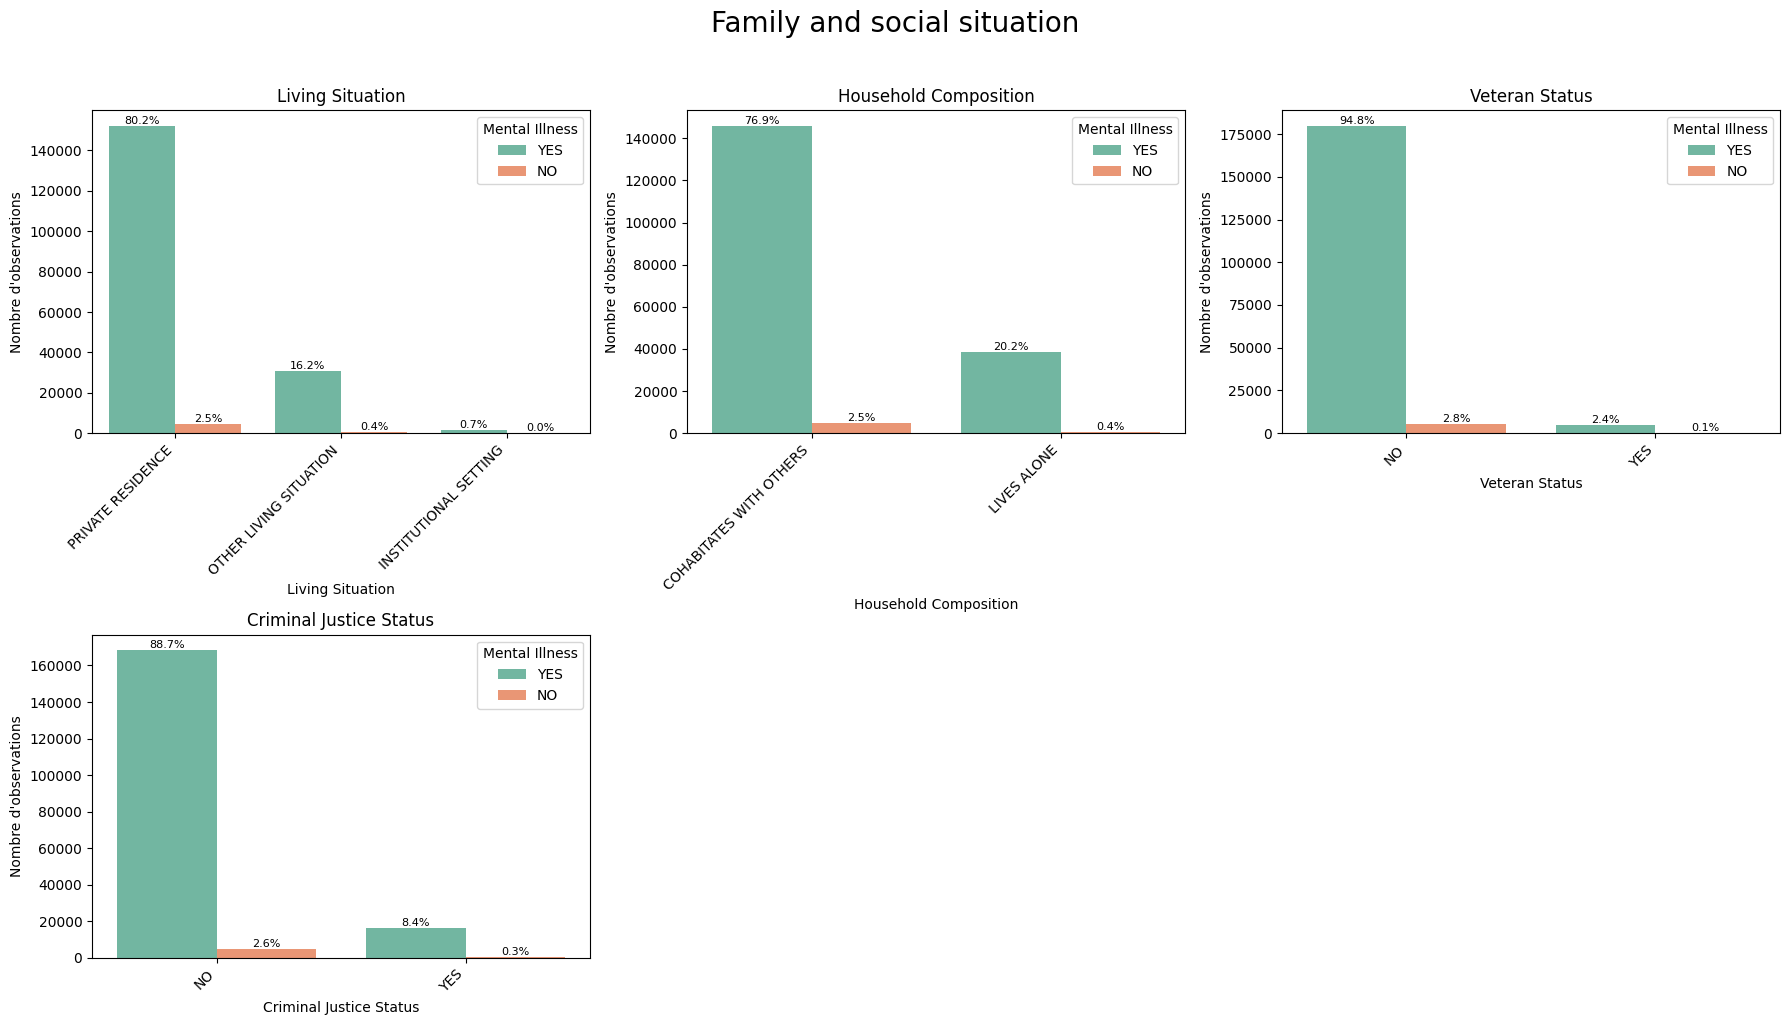

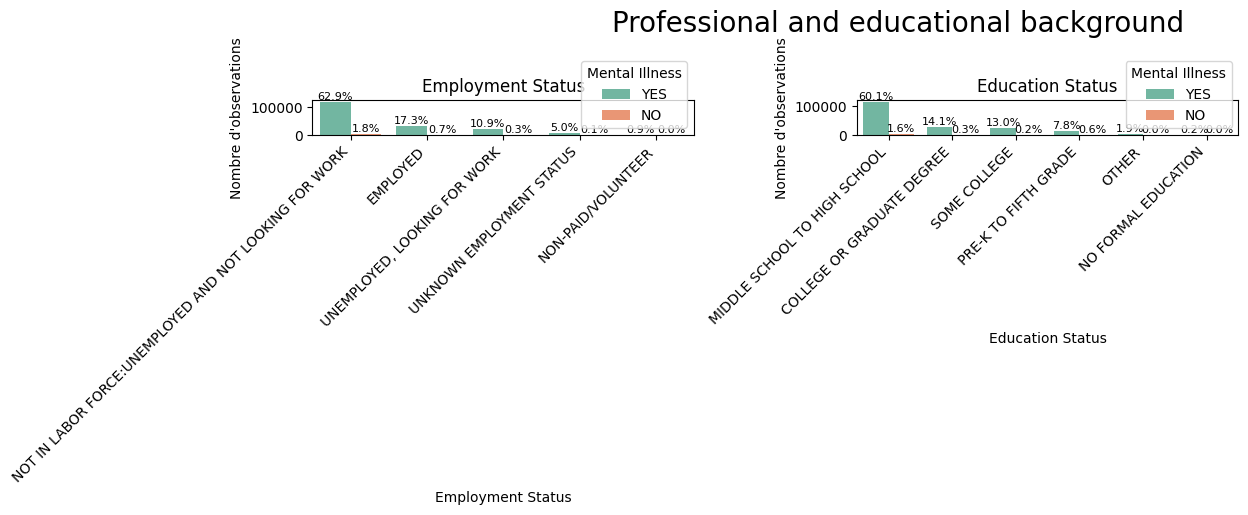

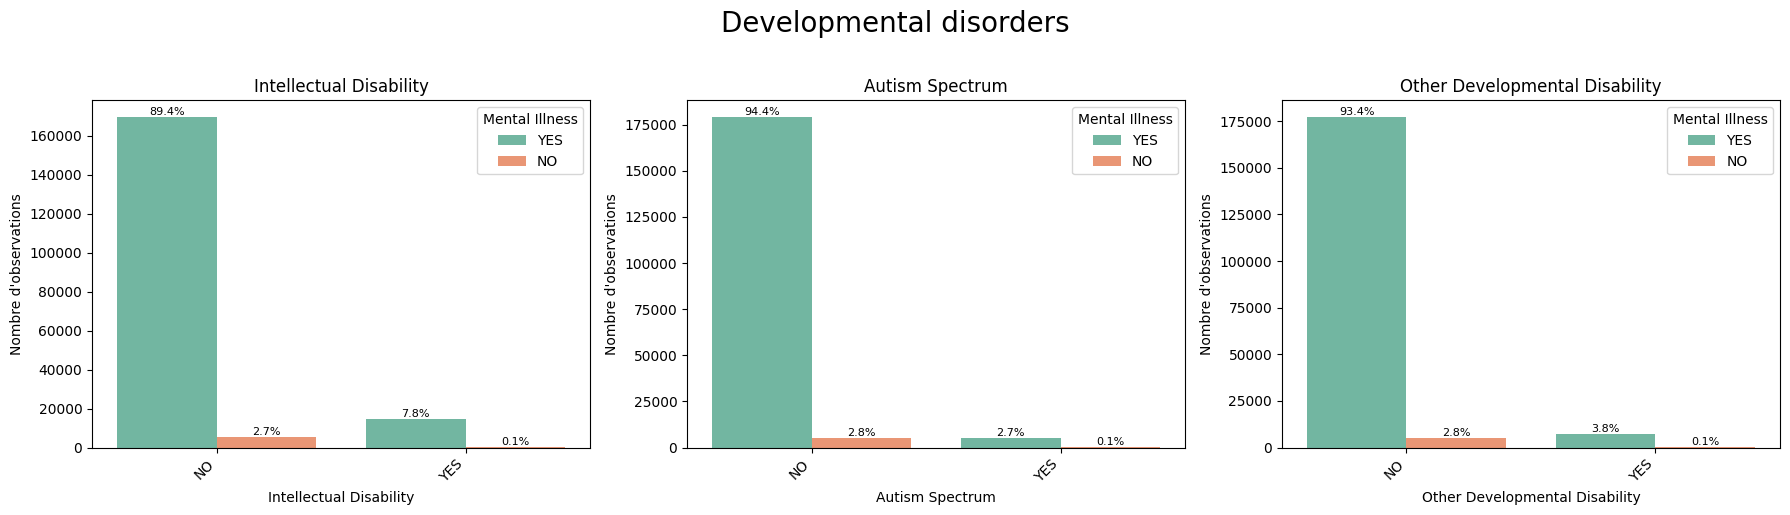

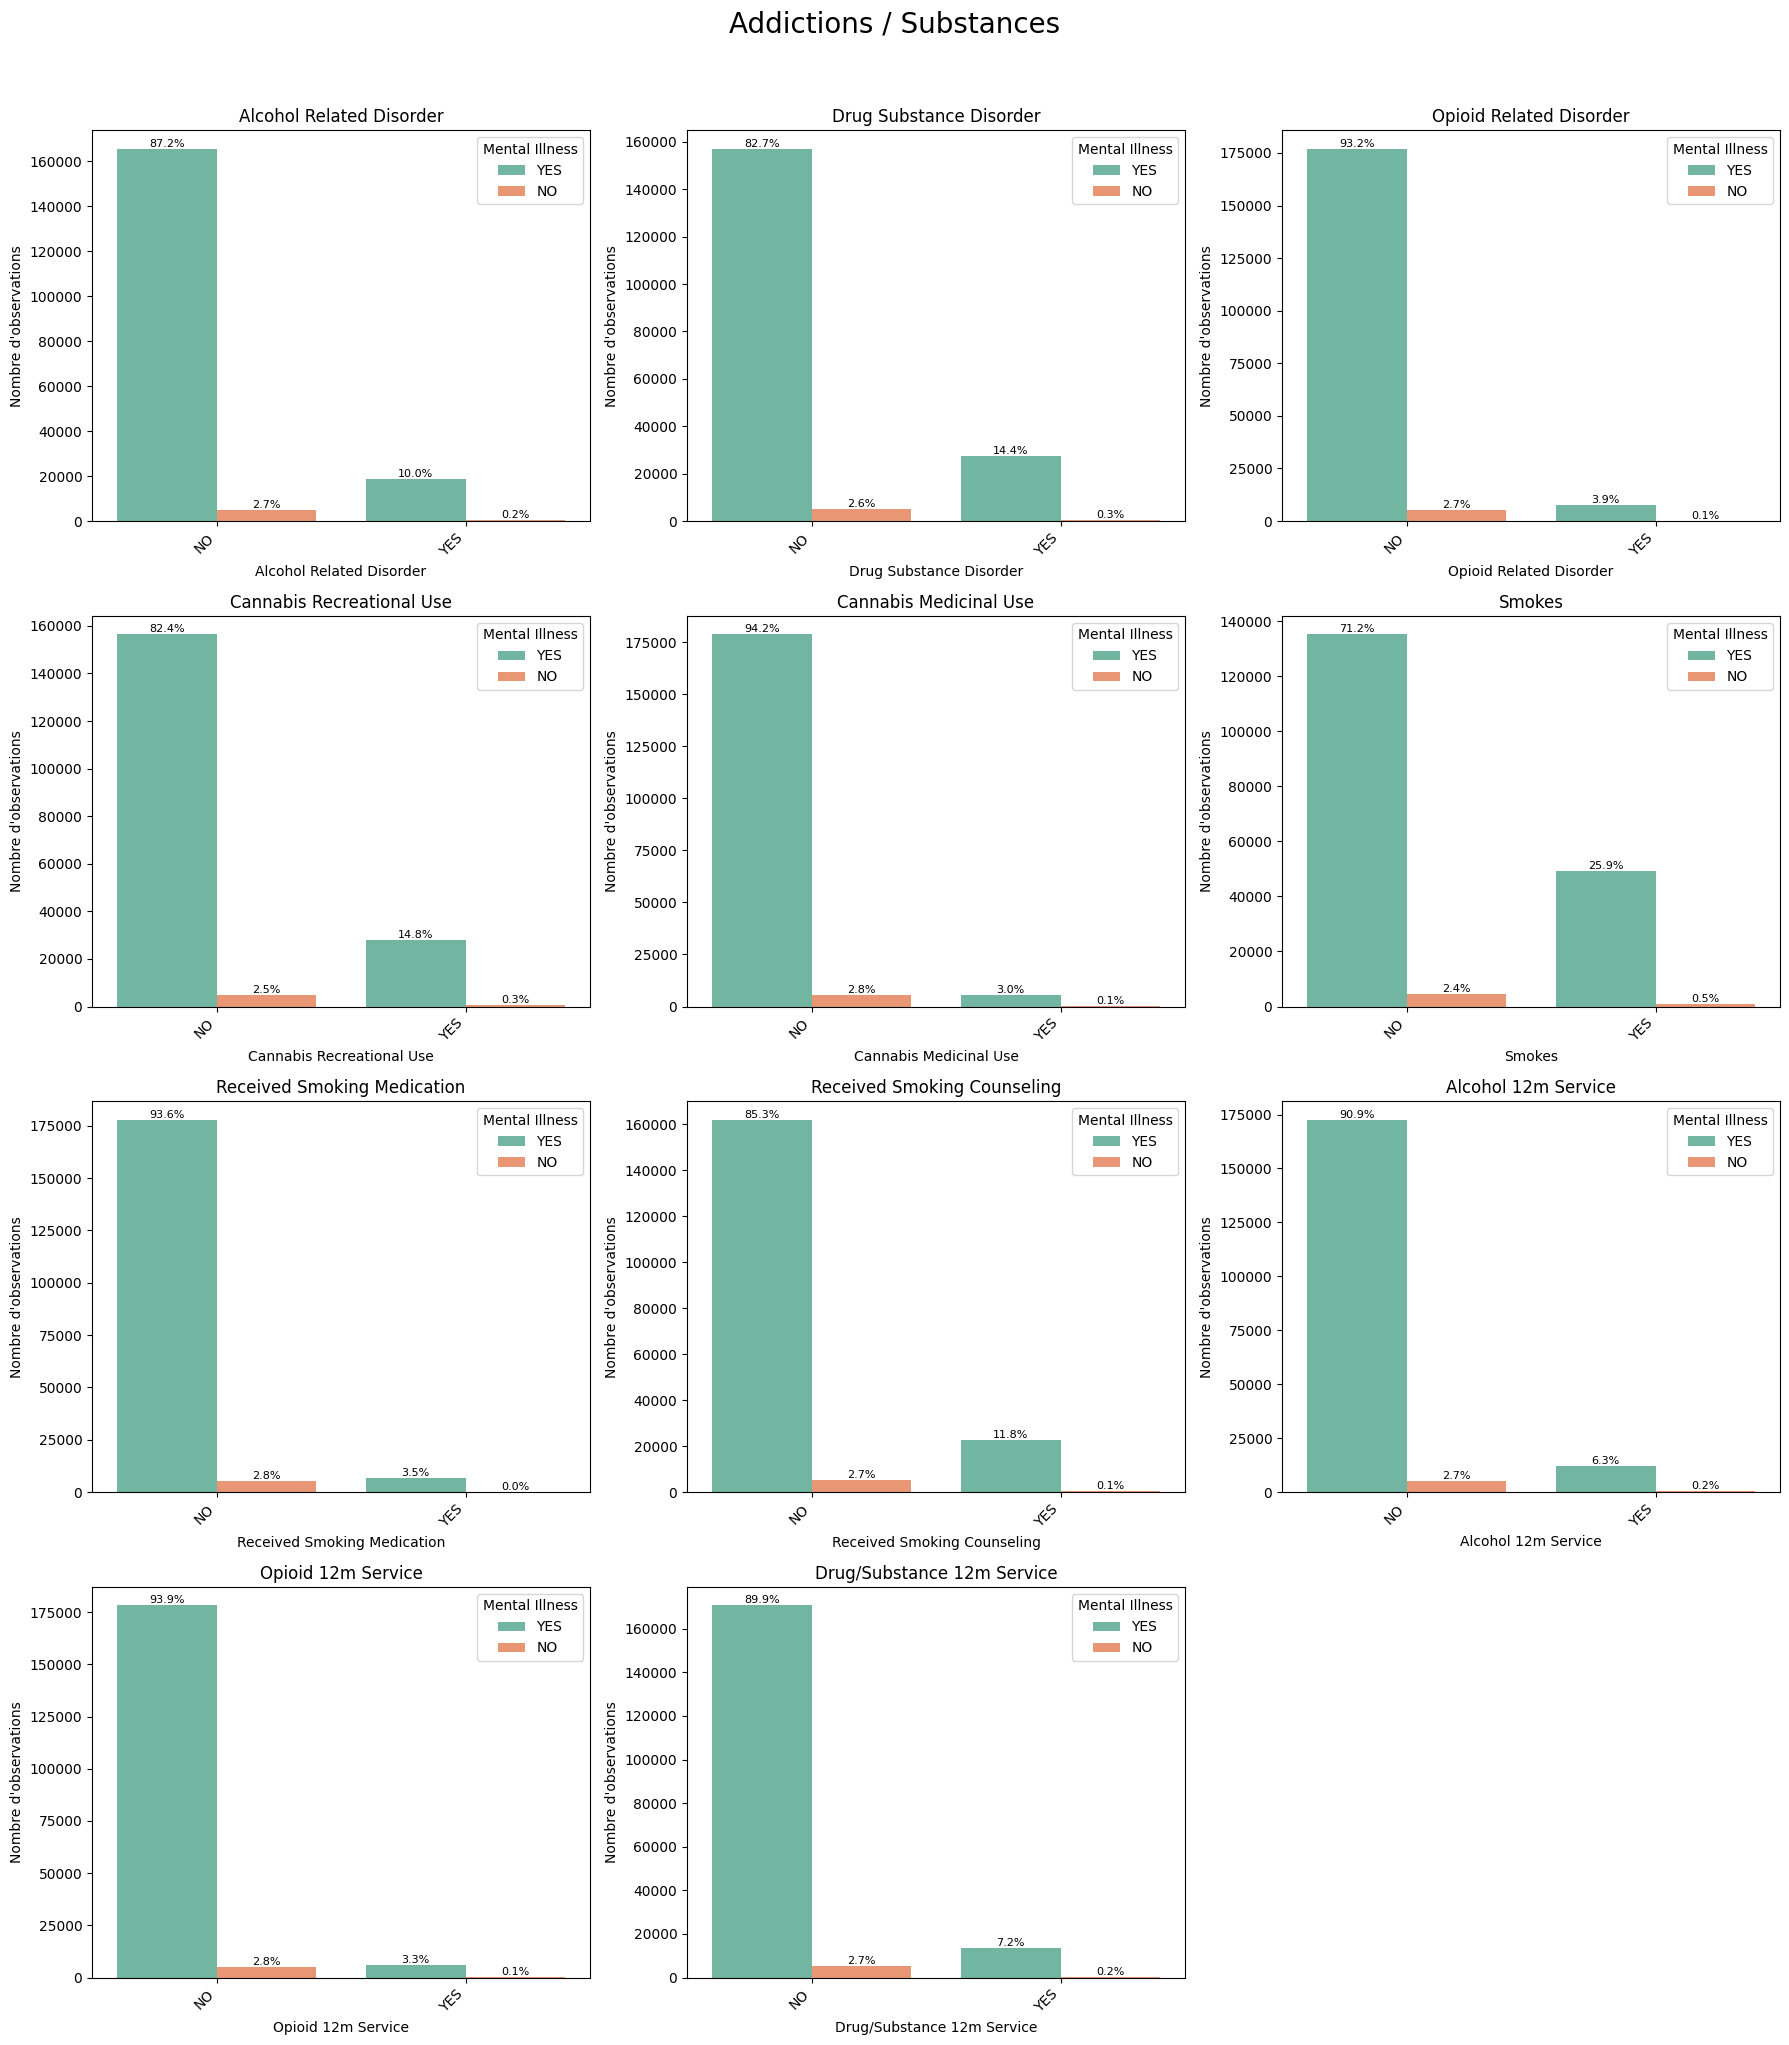

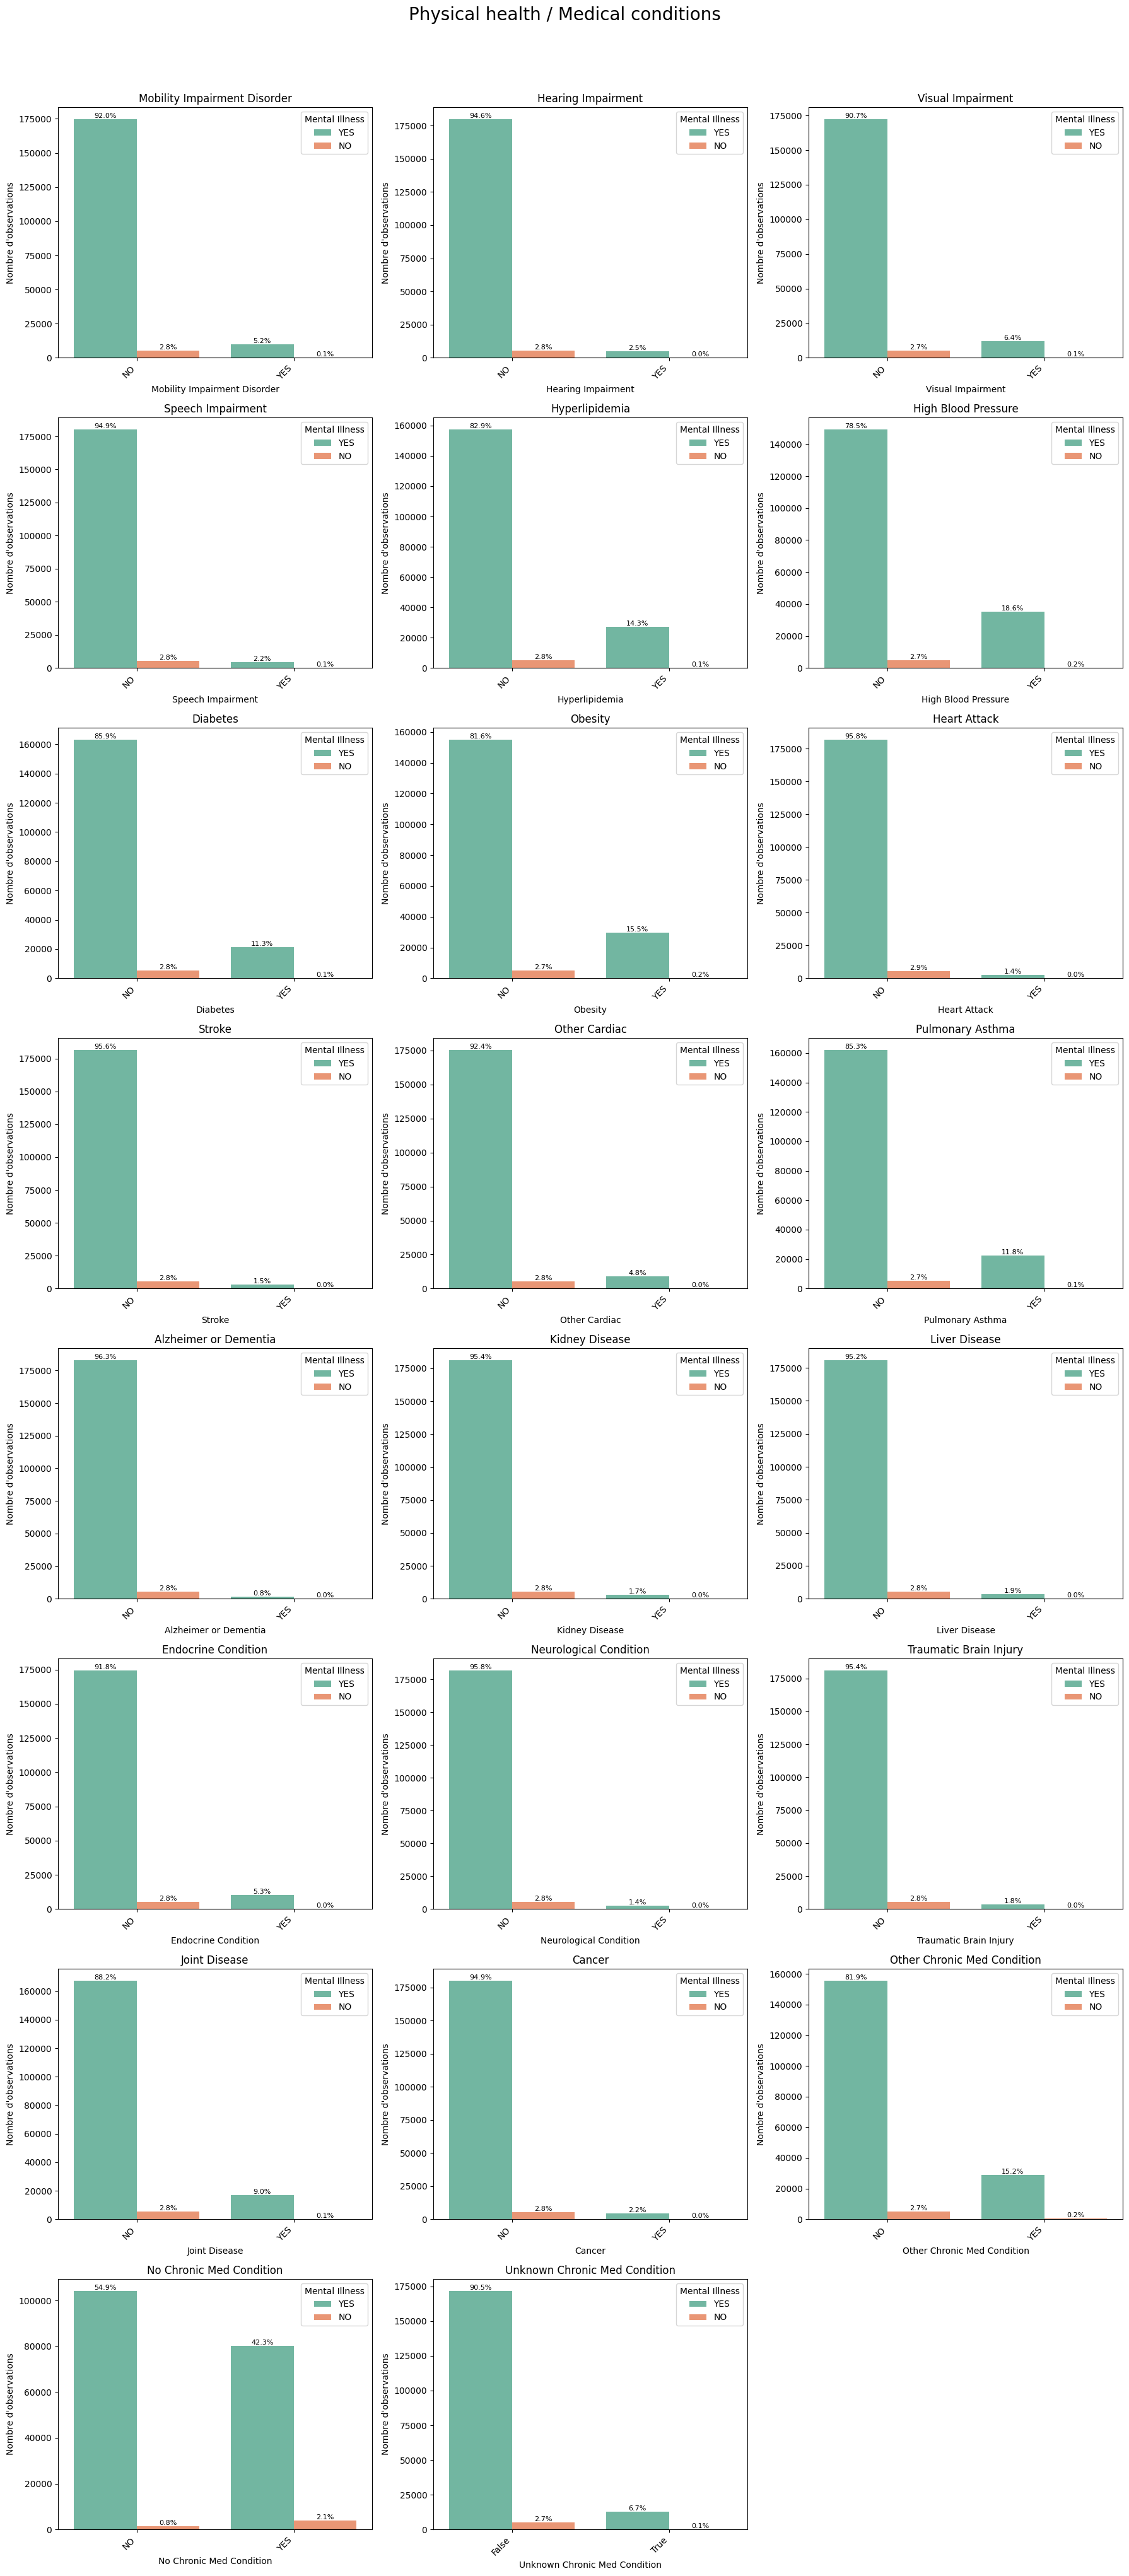

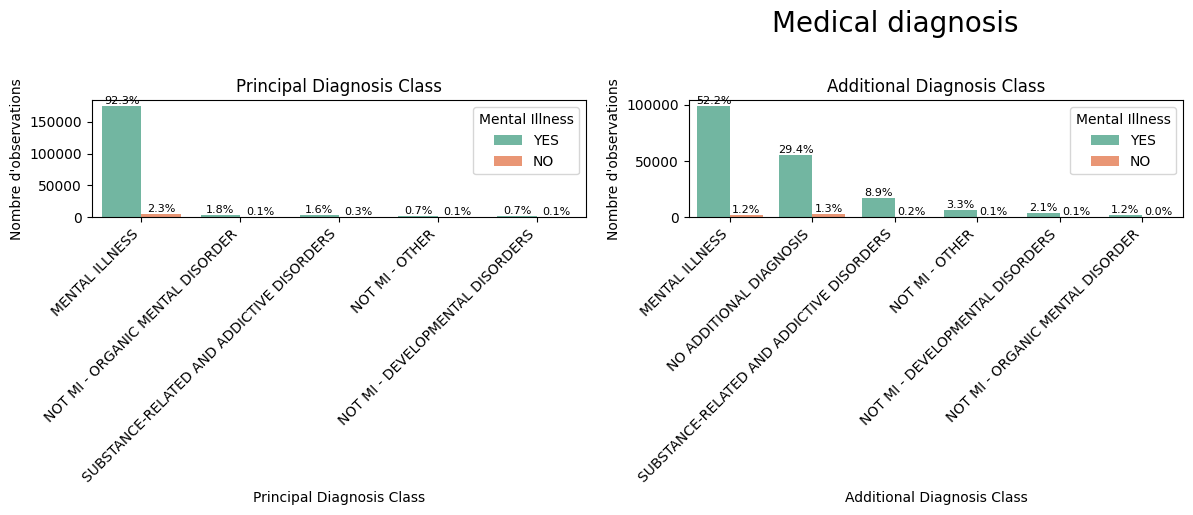

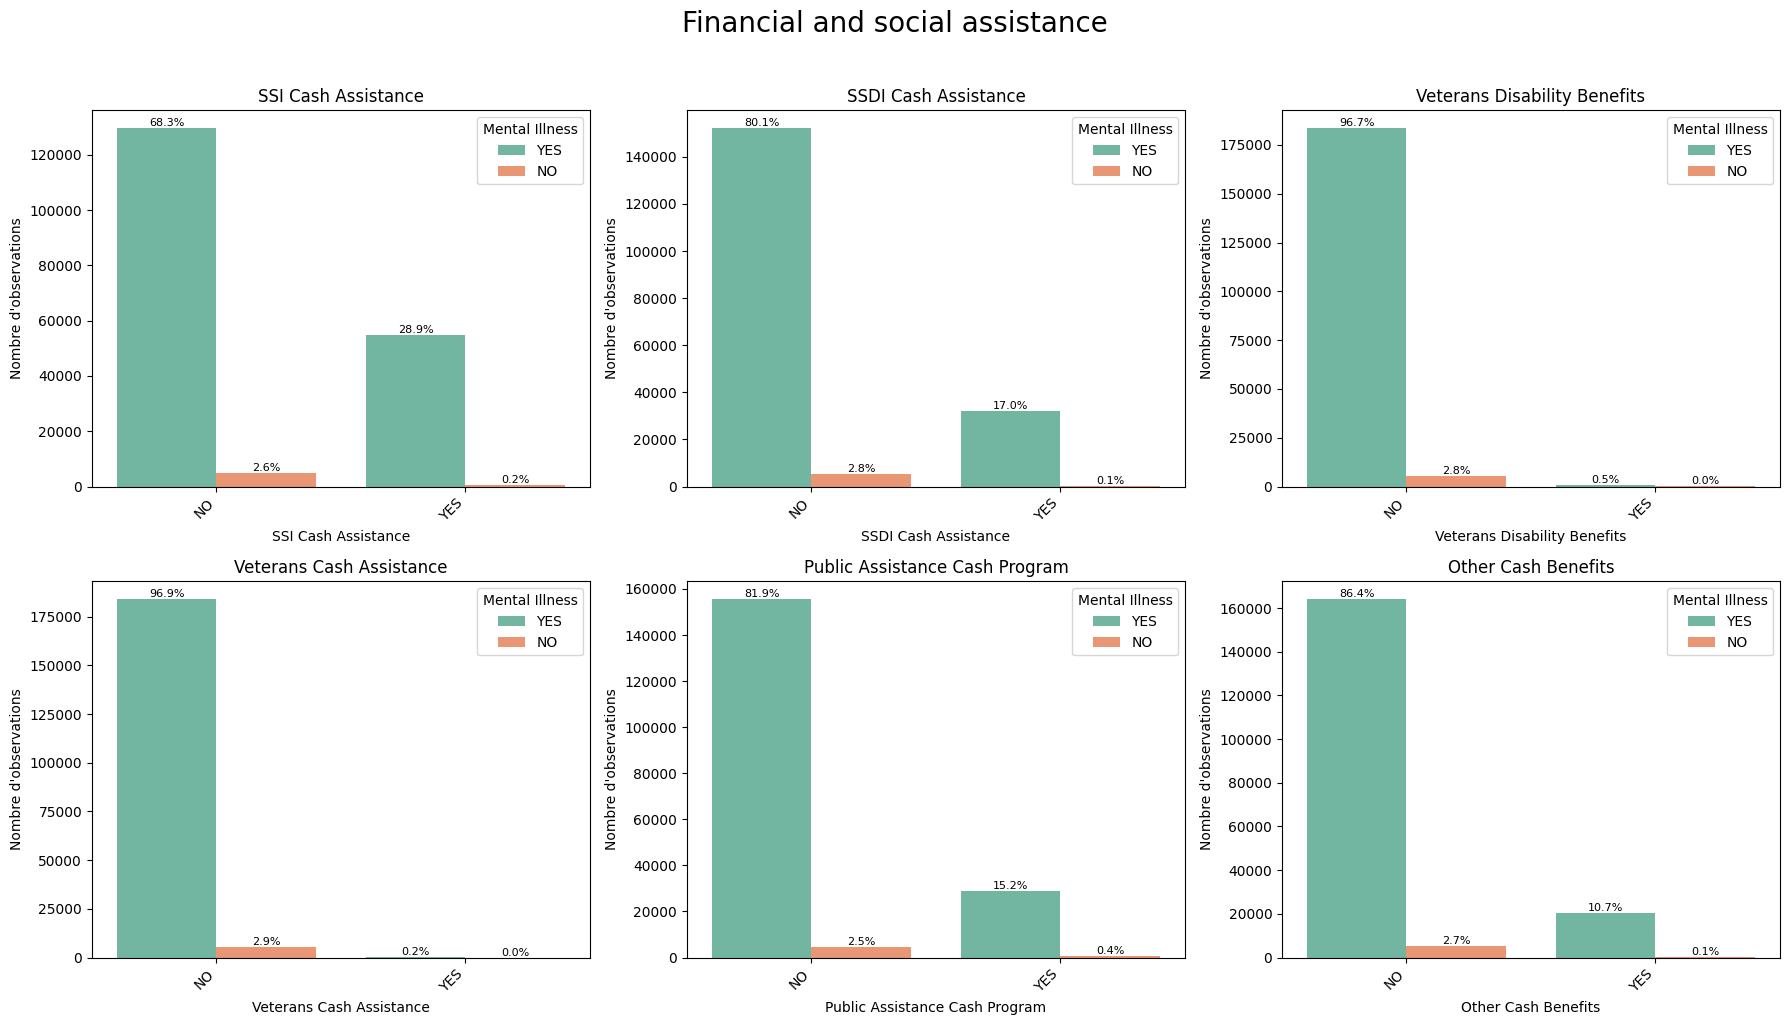

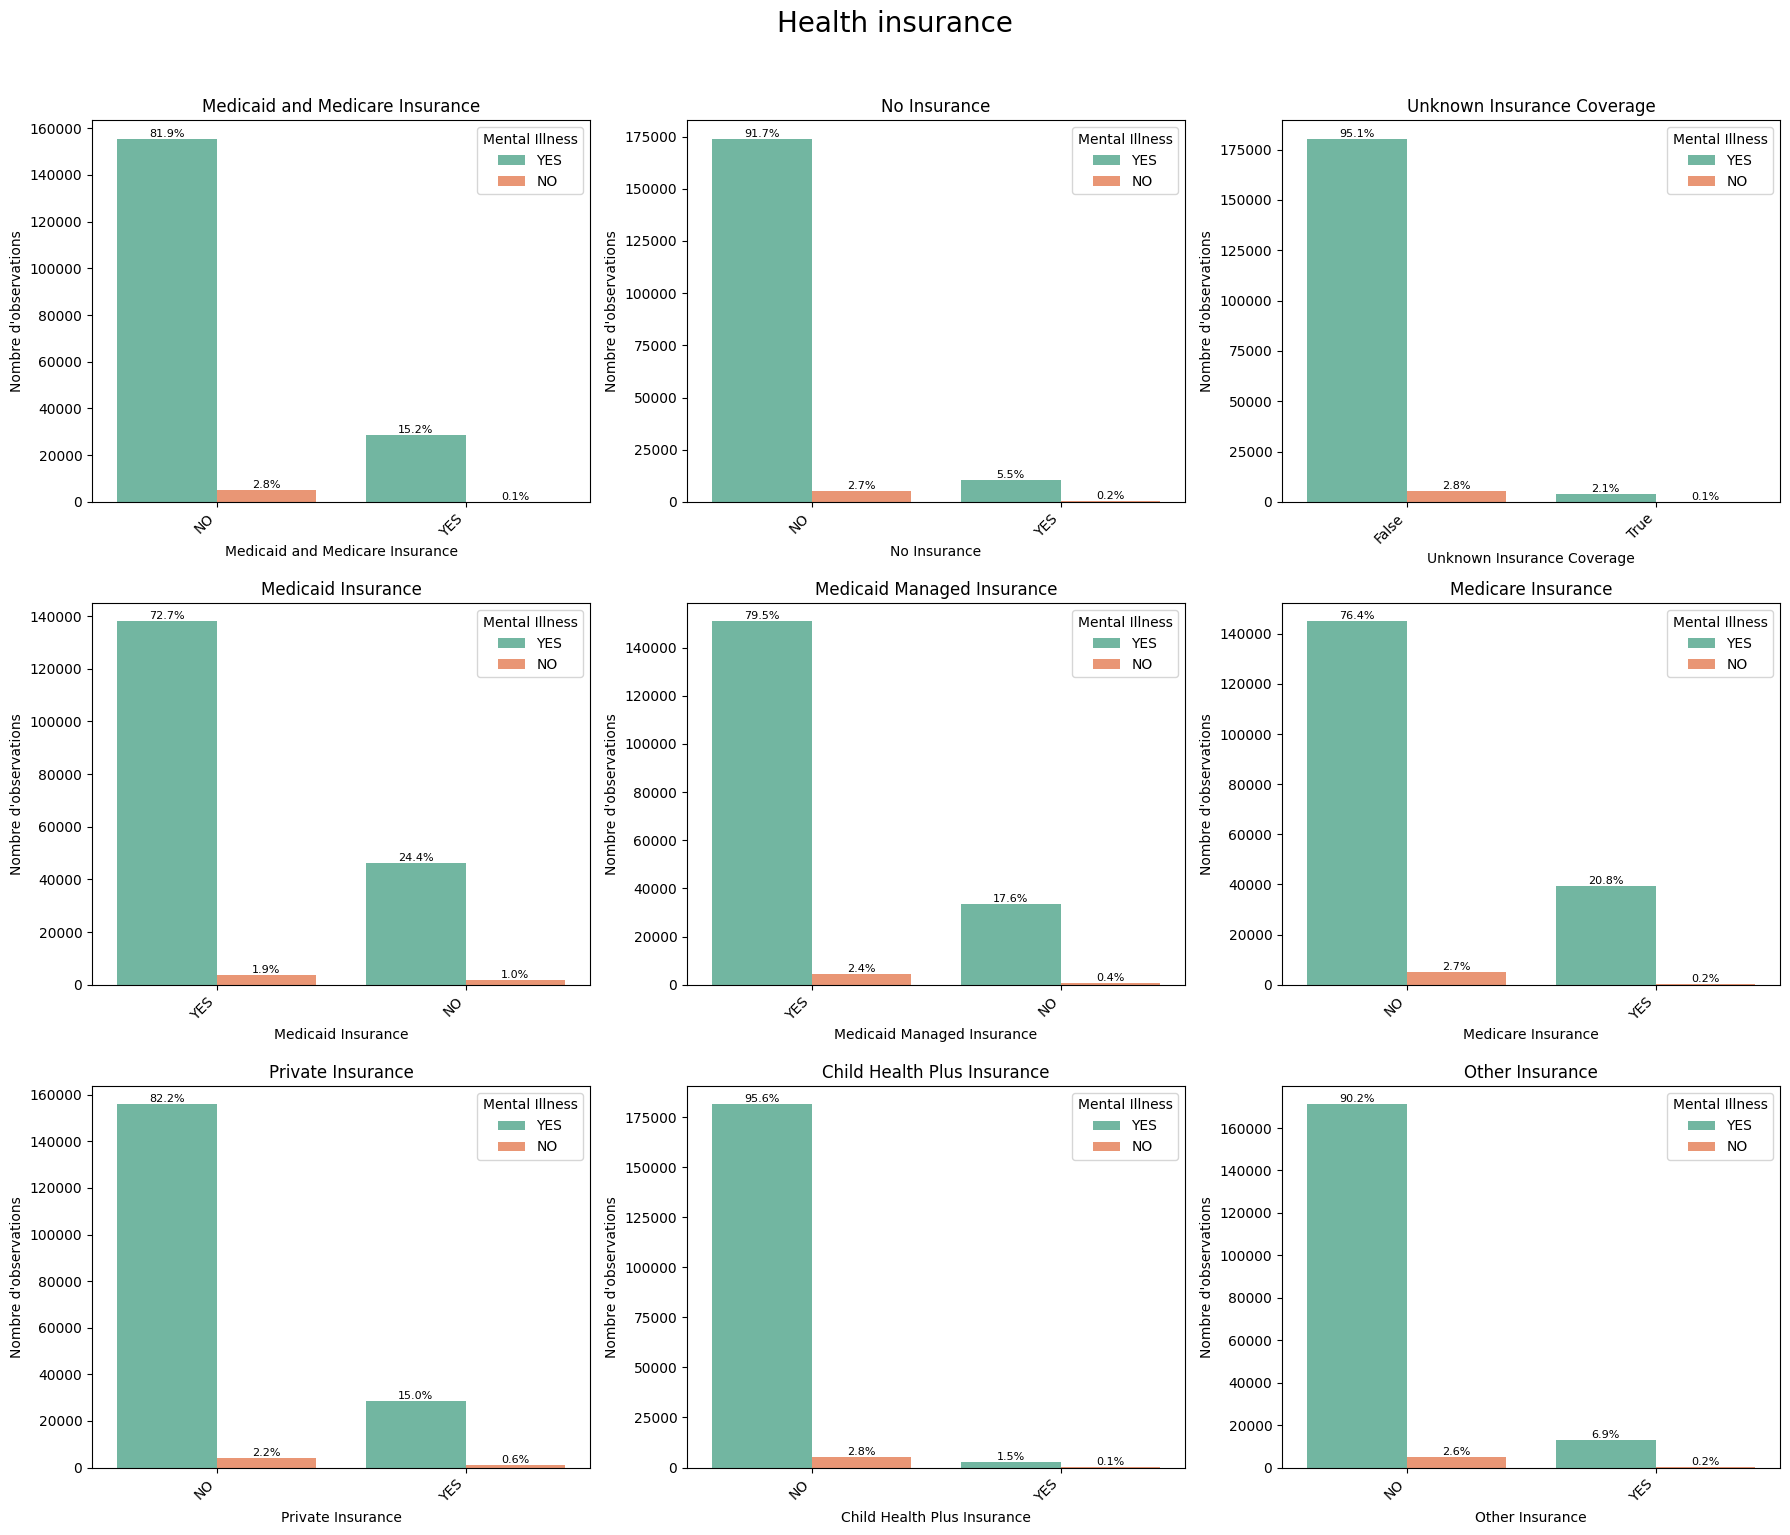

In [43]:
# Effectifs de la cible selon les modalités des variables catégorielles (par catégorie, subplots)
for cat, cols in categories.items():
    if not cols:
        continue
    plot_cols = [col for col in cols if col in data.columns]
    if not plot_cols:
        continue
    
    n = len(plot_cols)
    ncols = 3  # 3 graphes par ligne
    nrows = (n + ncols - 1) // ncols  # arrondi au supérieur

    plt.figure(figsize=(6 * ncols, 5 * nrows))

    for i, col in enumerate(plot_cols, 1):
        plt.subplot(nrows, ncols, i)

        # Graphique
        ax = sns.countplot(
            data=data,
            x=col,
            hue=target_col,
            palette="Set2",
            order=data[col].value_counts().index
        )

        # Ajout des pourcentages
        total = len(data)
        for container in ax.containers:
            ax.bar_label(container, 
                         labels=[f"{(v/total*100):.1f}%" for v in container.datavalues],
                         fontsize=8)

        plt.title(f"{col}", fontsize=12)
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Nombre d'observations")
        plt.legend(title=target_col)

    plt.suptitle(f"{cat}", fontsize=20, y=1.02)
    plt.tight_layout()
    plt.show()


- faire une 3e dataframe ou les valeurs manquantes sont retirées
- test chi2 pour voir les variables importantes (matrice corrélations)
- faire 3 modèles différents :
    - un avec les toutes les variables
    - un avec les variables manquantes featuring
    - un avec les variables manquantes supprimées